<p style="background-color:rgb(224, 245, 105);font-family:newtimeroman;color:rgb(12, 12, 12);font-size:150%;text-align:center;border-radius:10px 10px;">
Exercise - 09</p>

<p style="background-color:rgb(224, 245, 105);font-family:newtimeroman;color:rgb(12, 12, 12);font-size:150%;text-align:center;border-radius:10px 10px;">
 The dataset contains medical data of patients, where each row represents a patient, and each column represents a different medical measurement or attribute. The last column, "target," indicates whether the individual experienced a heart attack or not after the treatment. The columns in the dataset are as follows:

age: Age of the patient<br>
sex: Gender of the patient (1: Male, 0: Female)<br>
cp: Chest pain type (0, 1, 2, 3)<br>
trestbps: Resting blood pressure (in mm Hg)<br>
chol: Serum cholesterol level (in mg/dL)<br>
fbs: Fasting blood sugar > 120 mg/dL (1 if true, 0 if false)<br>
restecg: Resting electrocardiographic results (0, 1, 2)<br>
thalach: Maximum heart rate achieved (in beats per minute)<br>
exang: Exercise induced angina (1 if yes, 0 if no)<br>
oldpeak: ST depression induced by exercise relative to rest<br>
slope: Slope of the peak exercise ST segment (0, 1, 2)<br>
ca: Number of major vessels colored by fluoroscopy (0 to 3)<br>
thal: Thalassemia type (3 = normal; 6 = fixed defect; 7 = reversible defect)<br>
target: Whether the patient experienced a heart attack (1) or not (0)<br>
This type of medical dataset is often used for analysis and predicting the likelihood of a heart attack occurrence in individuals. The common objective of analyzing medical data is to identify various factors that may contribute to the risk of a heart attack and discover relationships between these factors and the occurrence of heart attacks.</p>

<p style="background-color:rgb(224, 245, 105);font-family:newtimeroman;color:rgb(12, 12, 12);font-size:150%;text-align:center;border-radius:10px 10px;">
IMPORTING LIBRARY</p>

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
from sklearn.impute import SimpleImputer #work with nul data

<p style="background-color:rgb(224, 245, 105);font-family:newtimeroman;color:rgb(12, 12, 12);font-size:150%;text-align:center;border-radius:10px 10px;"> LOADING DATA</p>

In [2]:
data=pd.read_csv("heart.csv")

In [3]:
rows,cols = data.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  303
Number of columns:  14


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


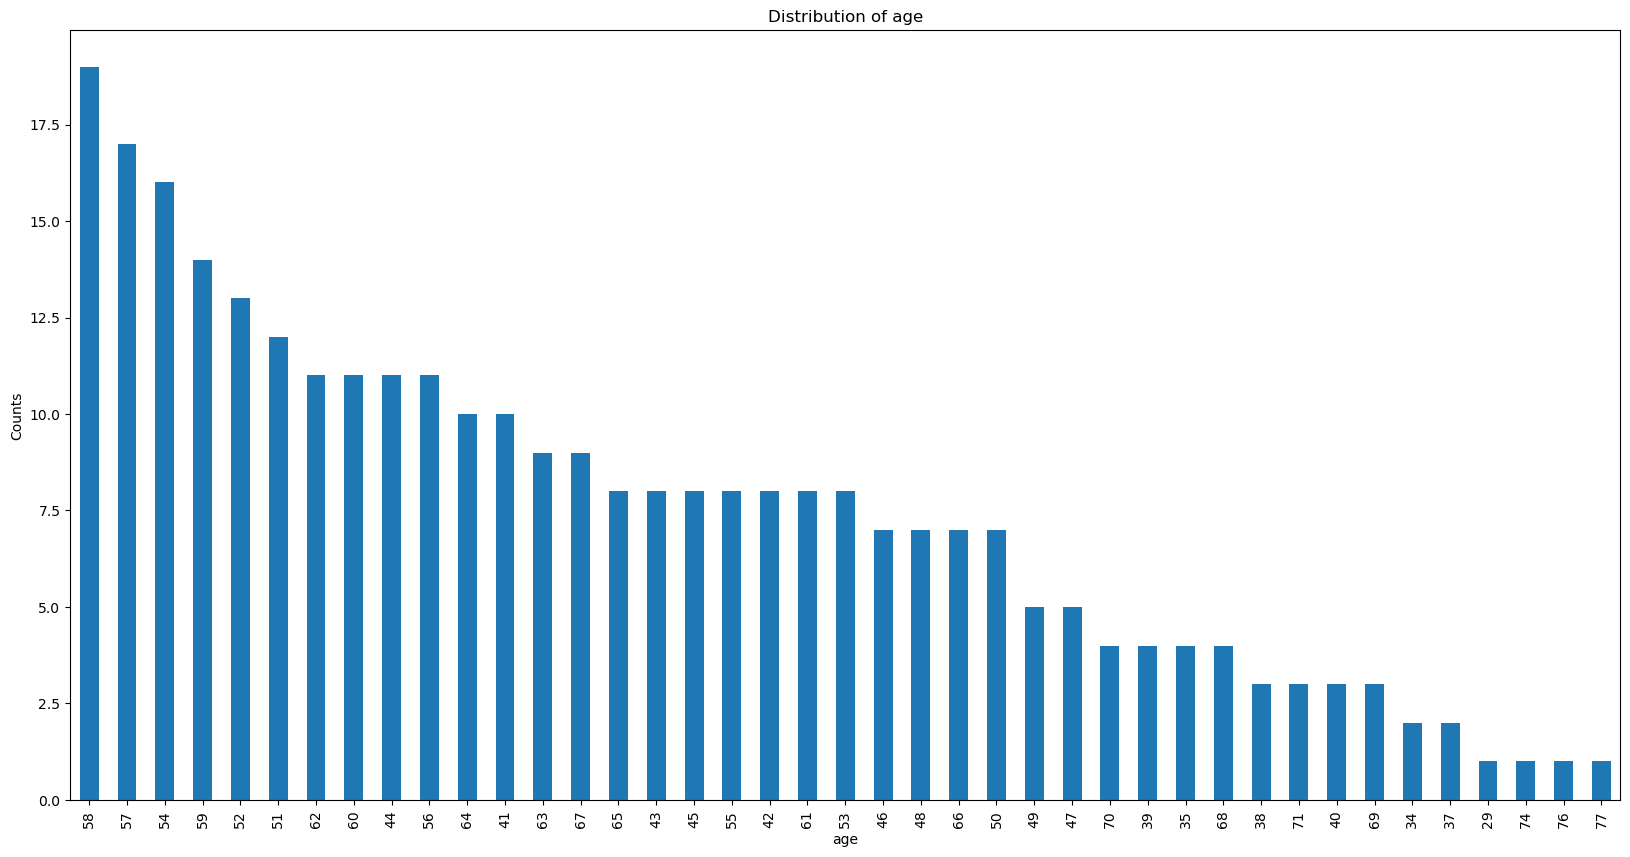

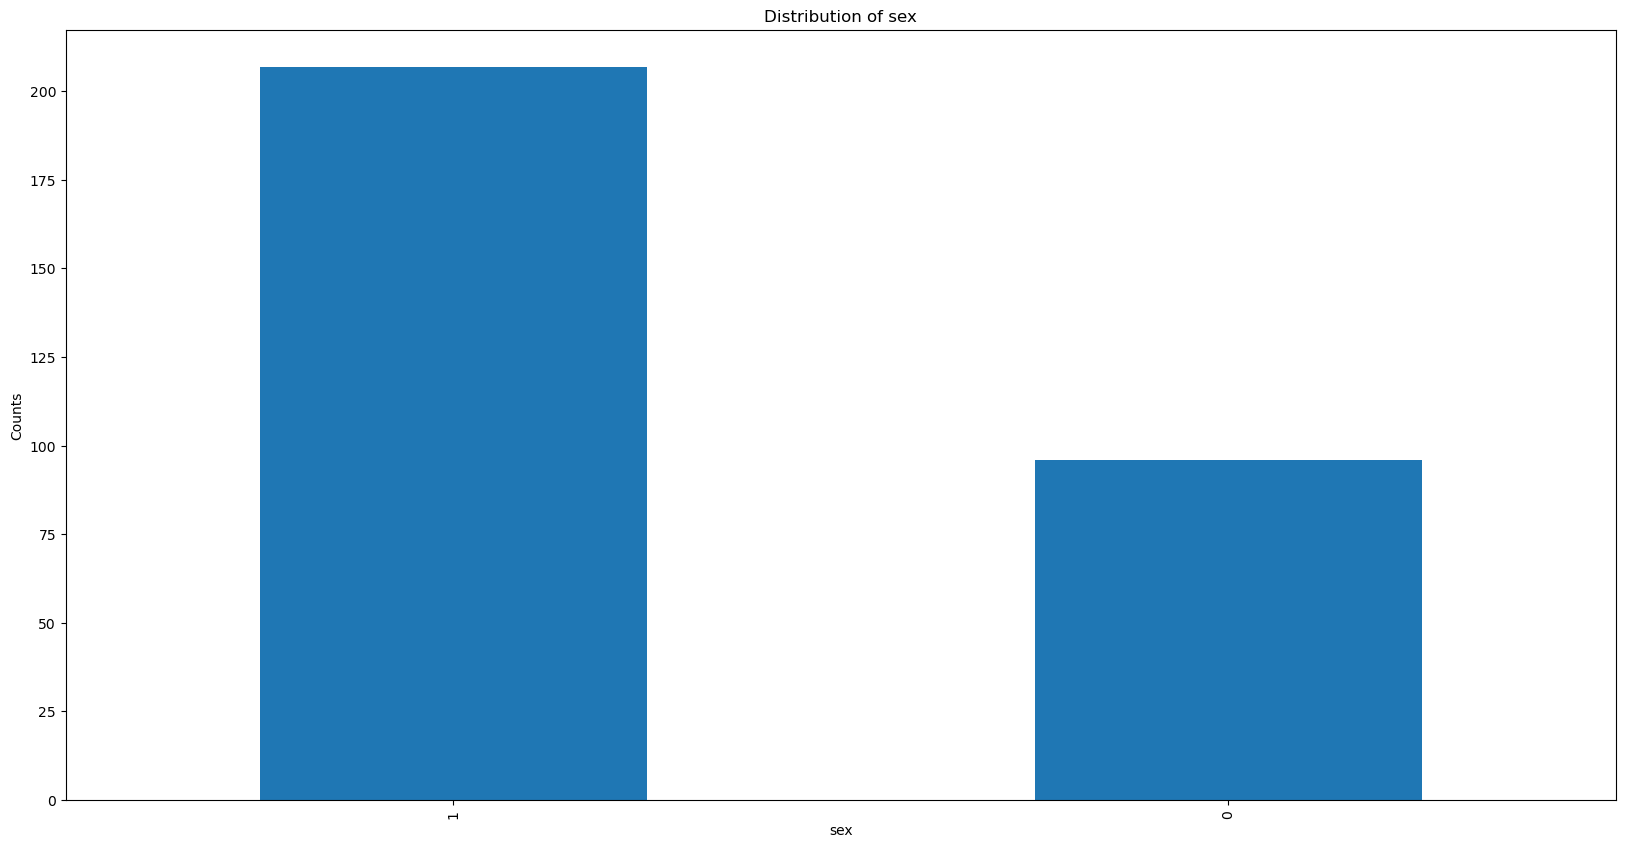

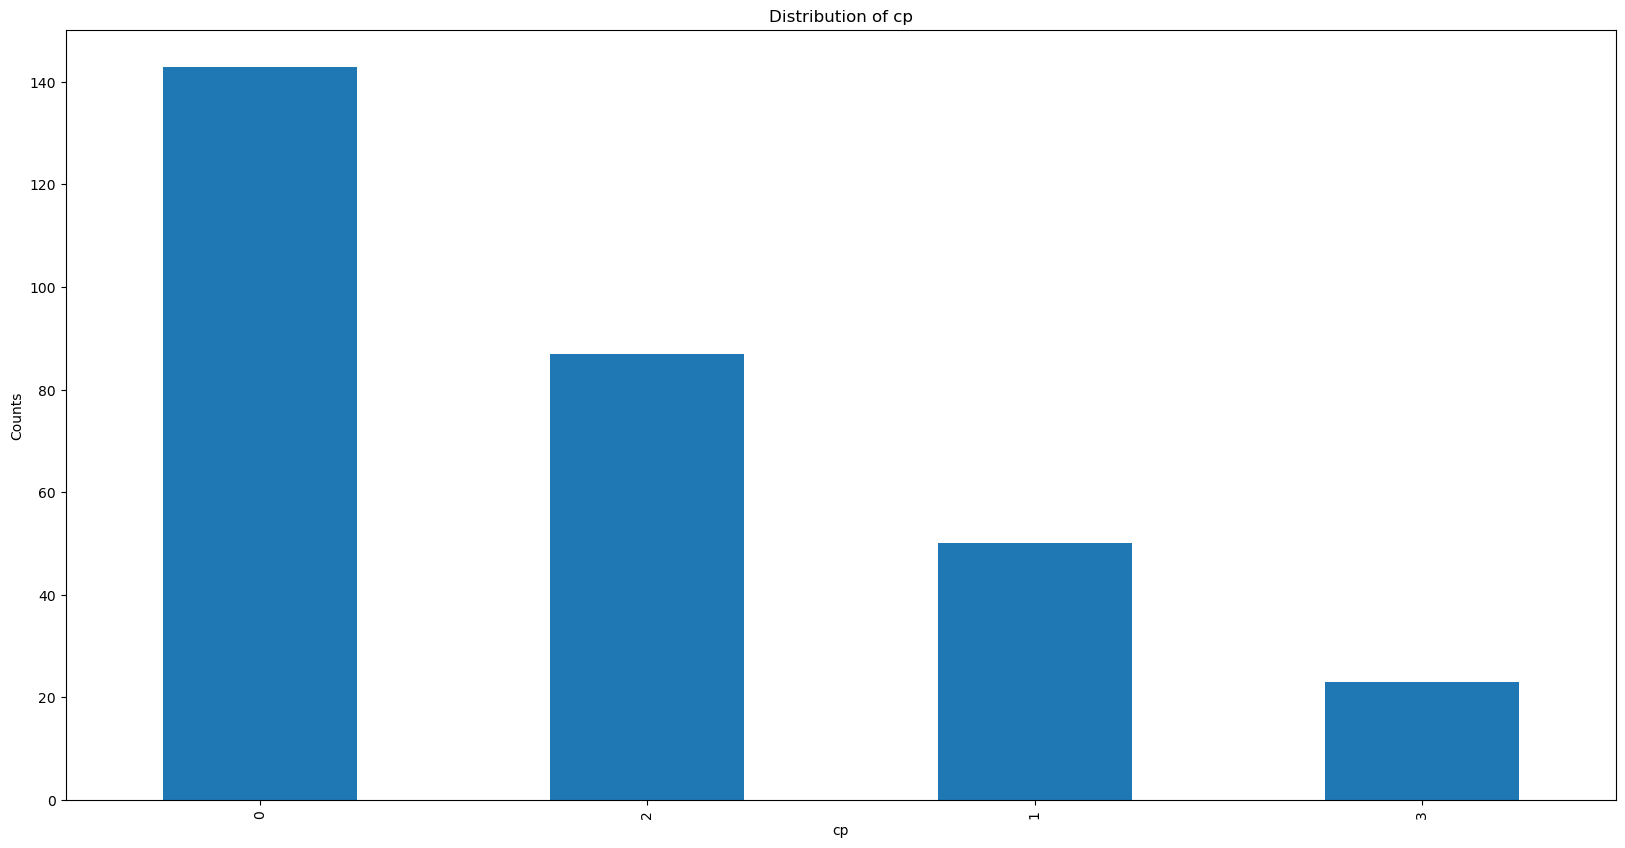

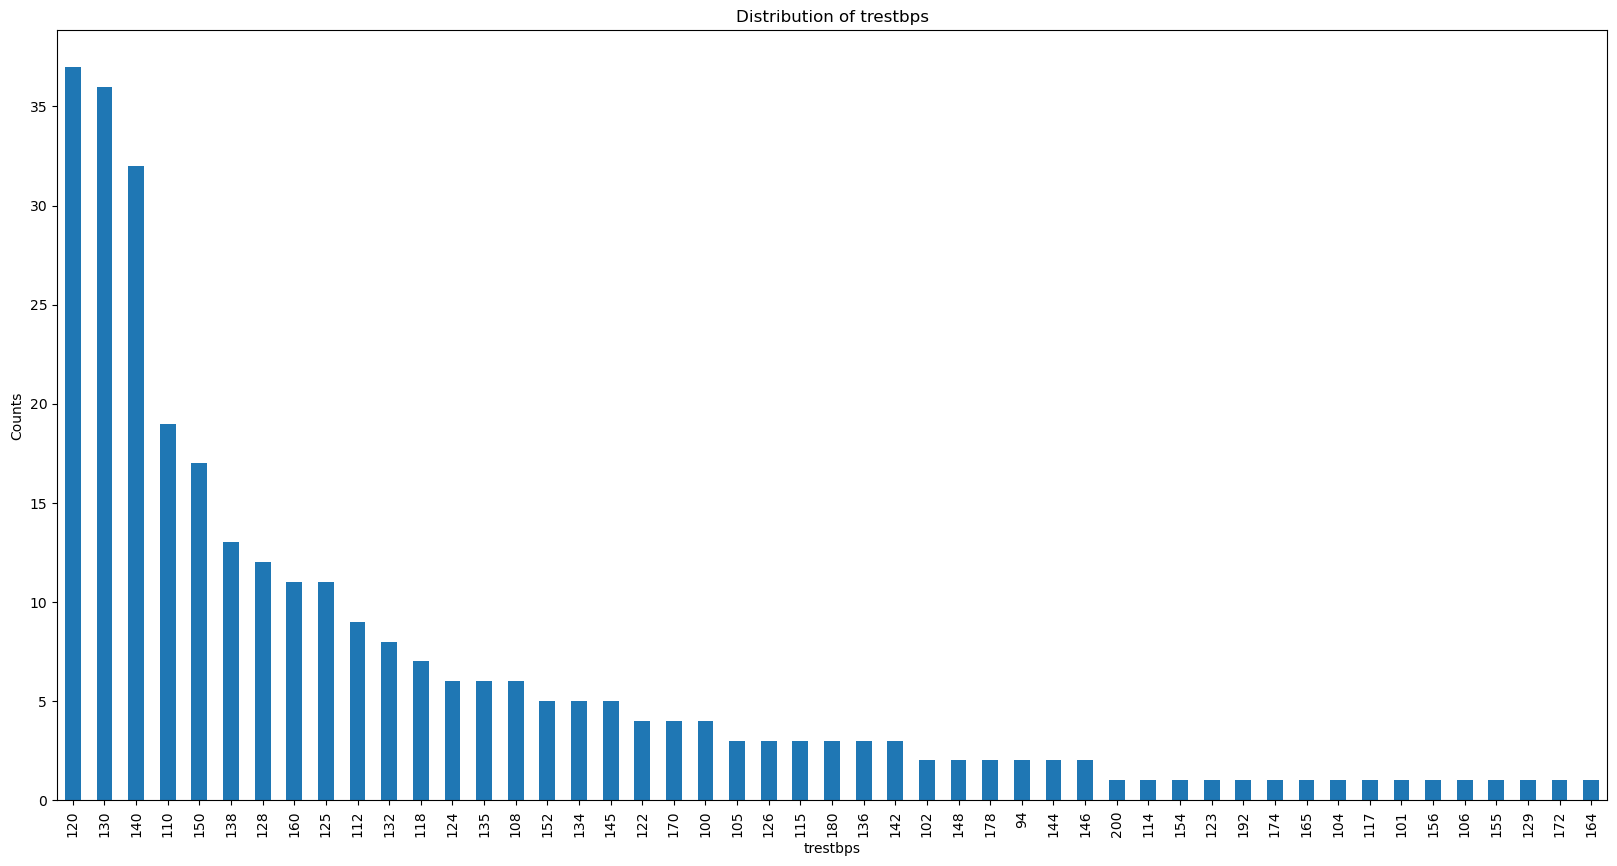

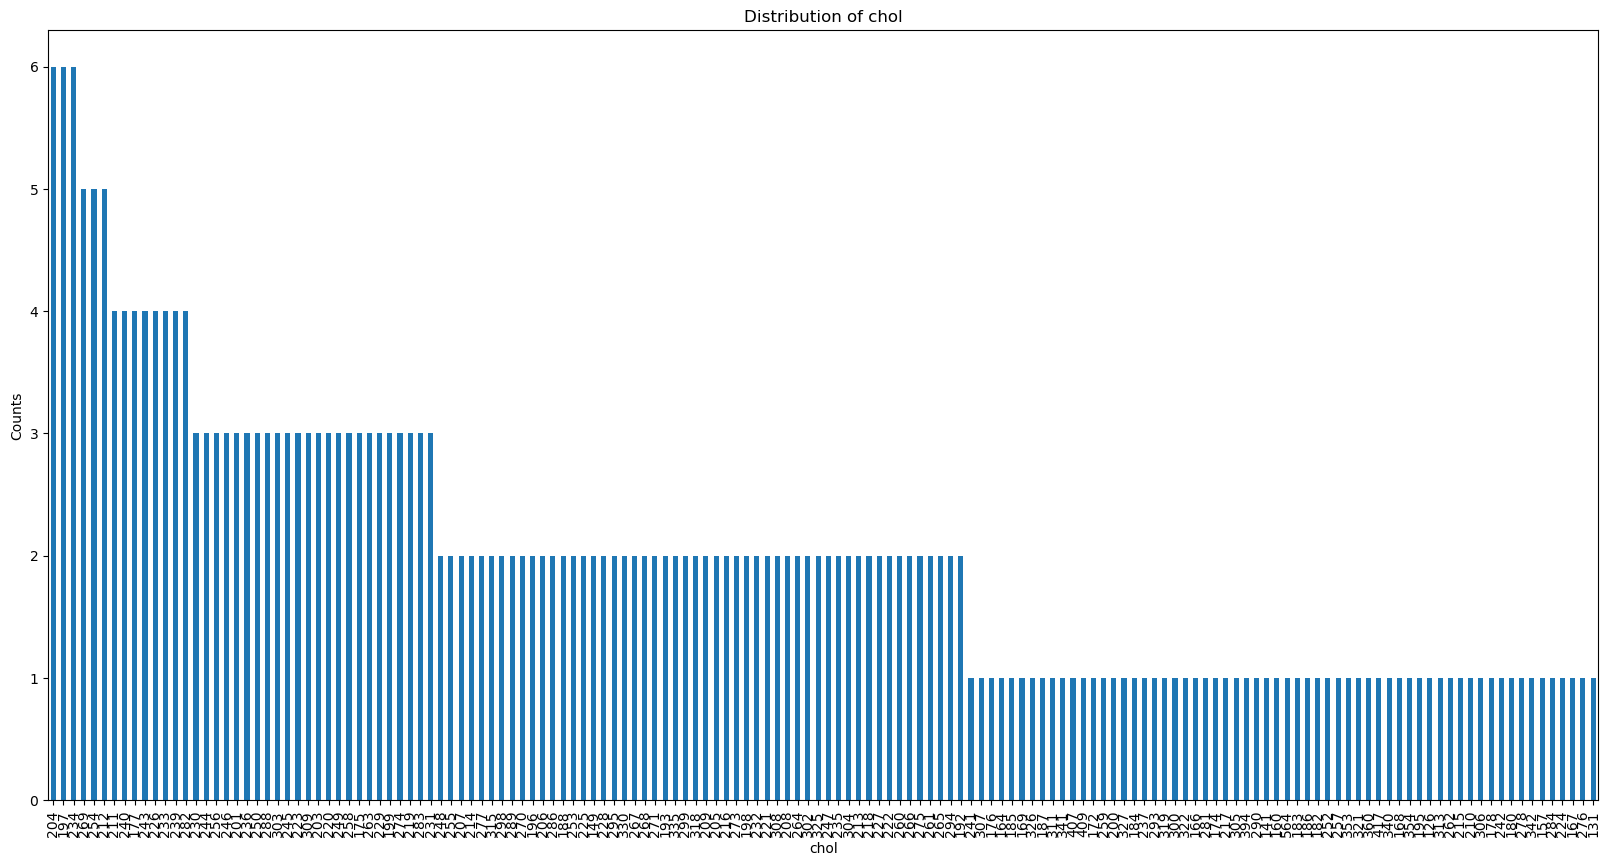

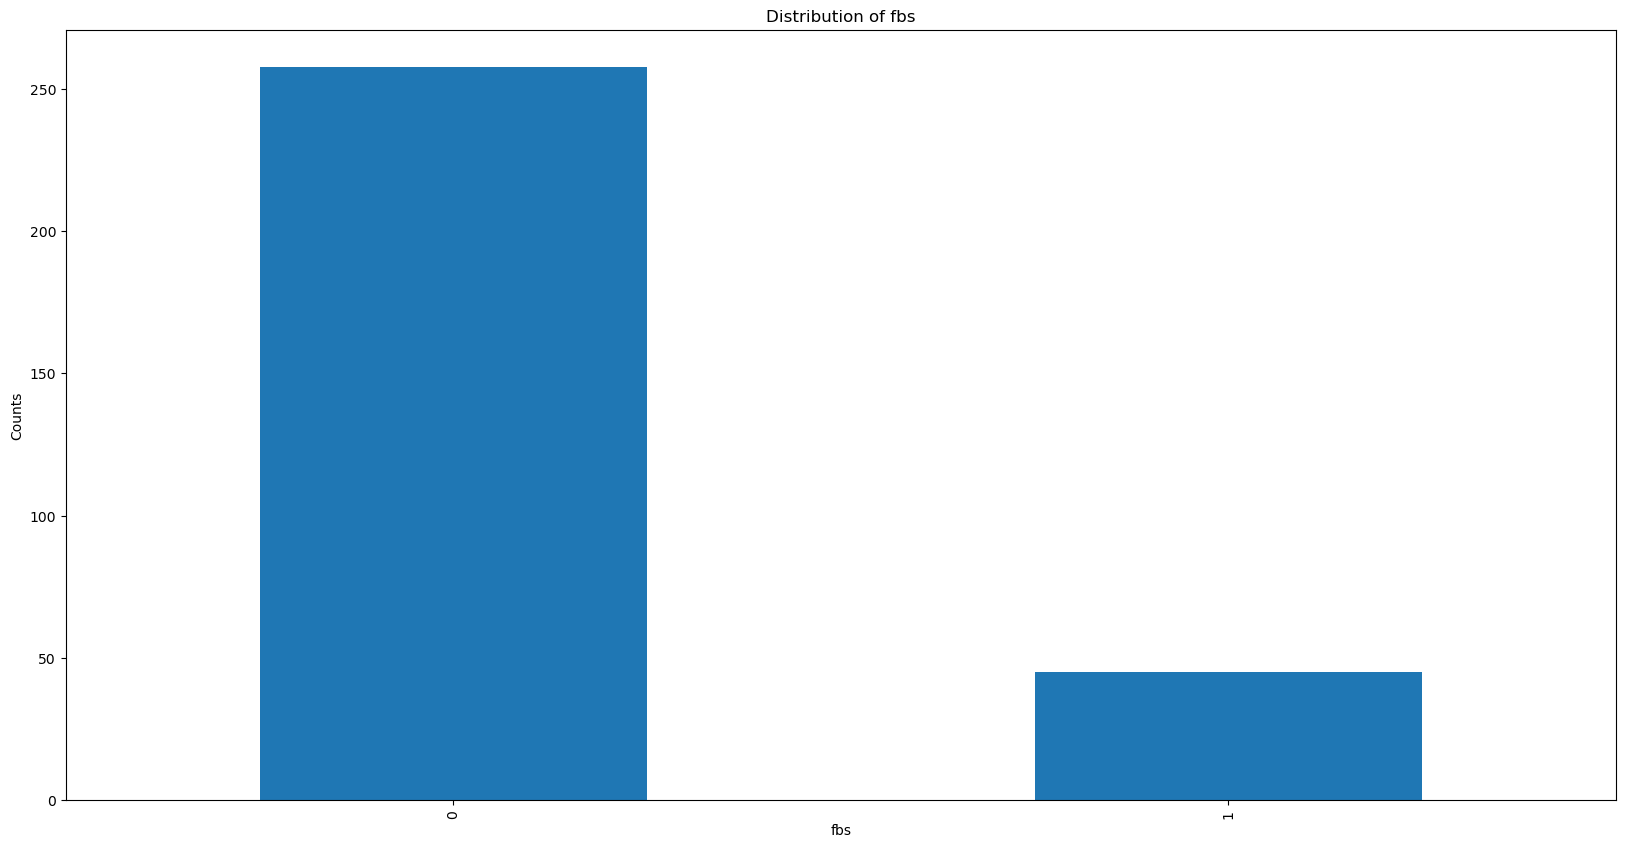

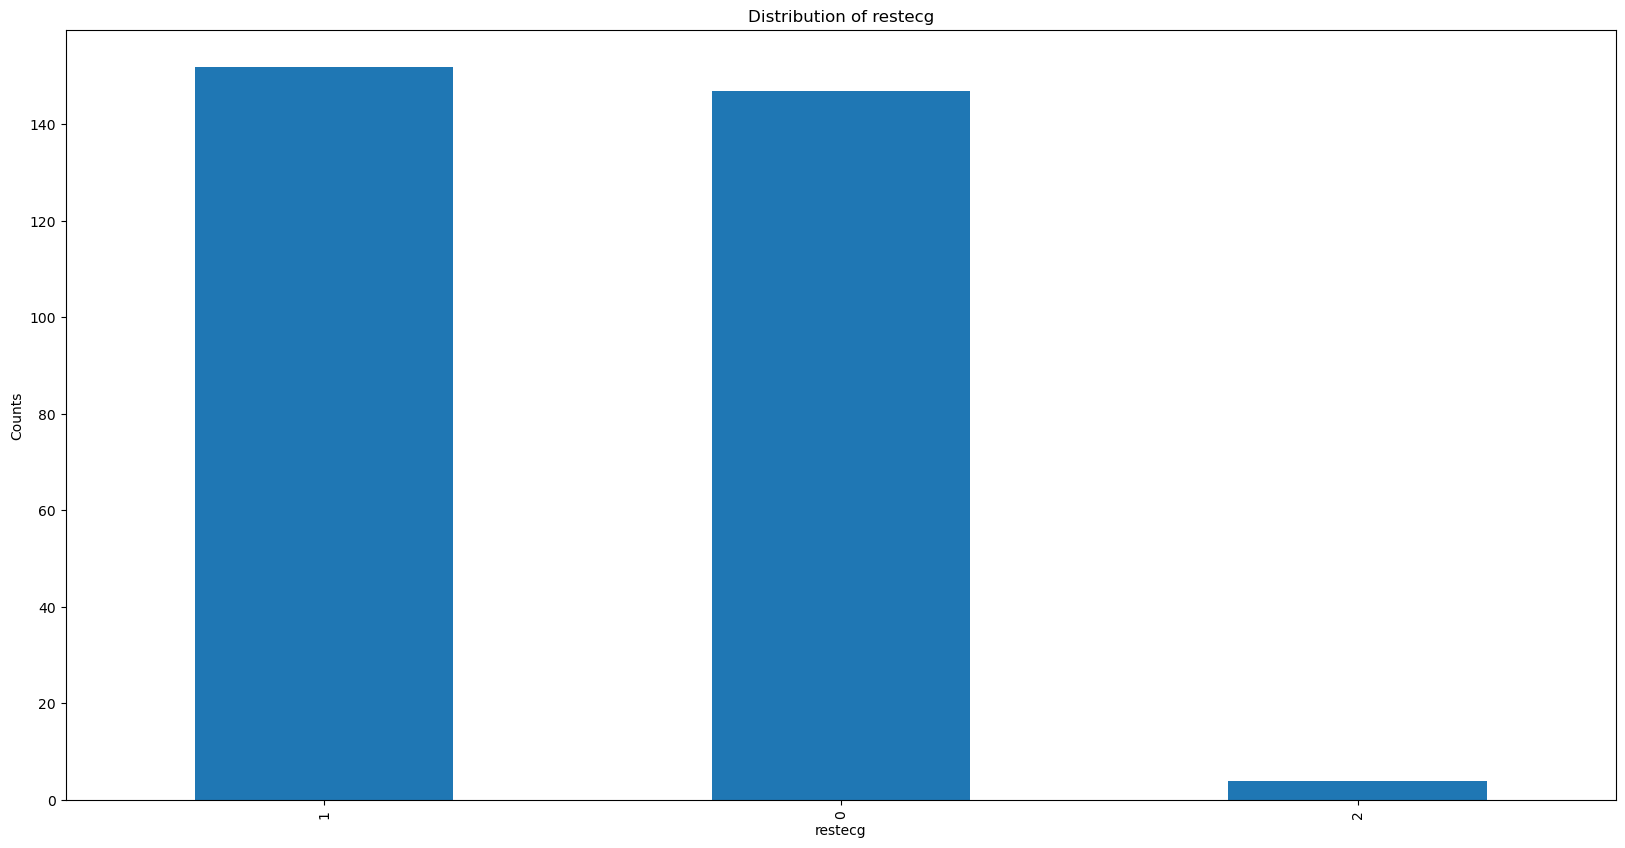

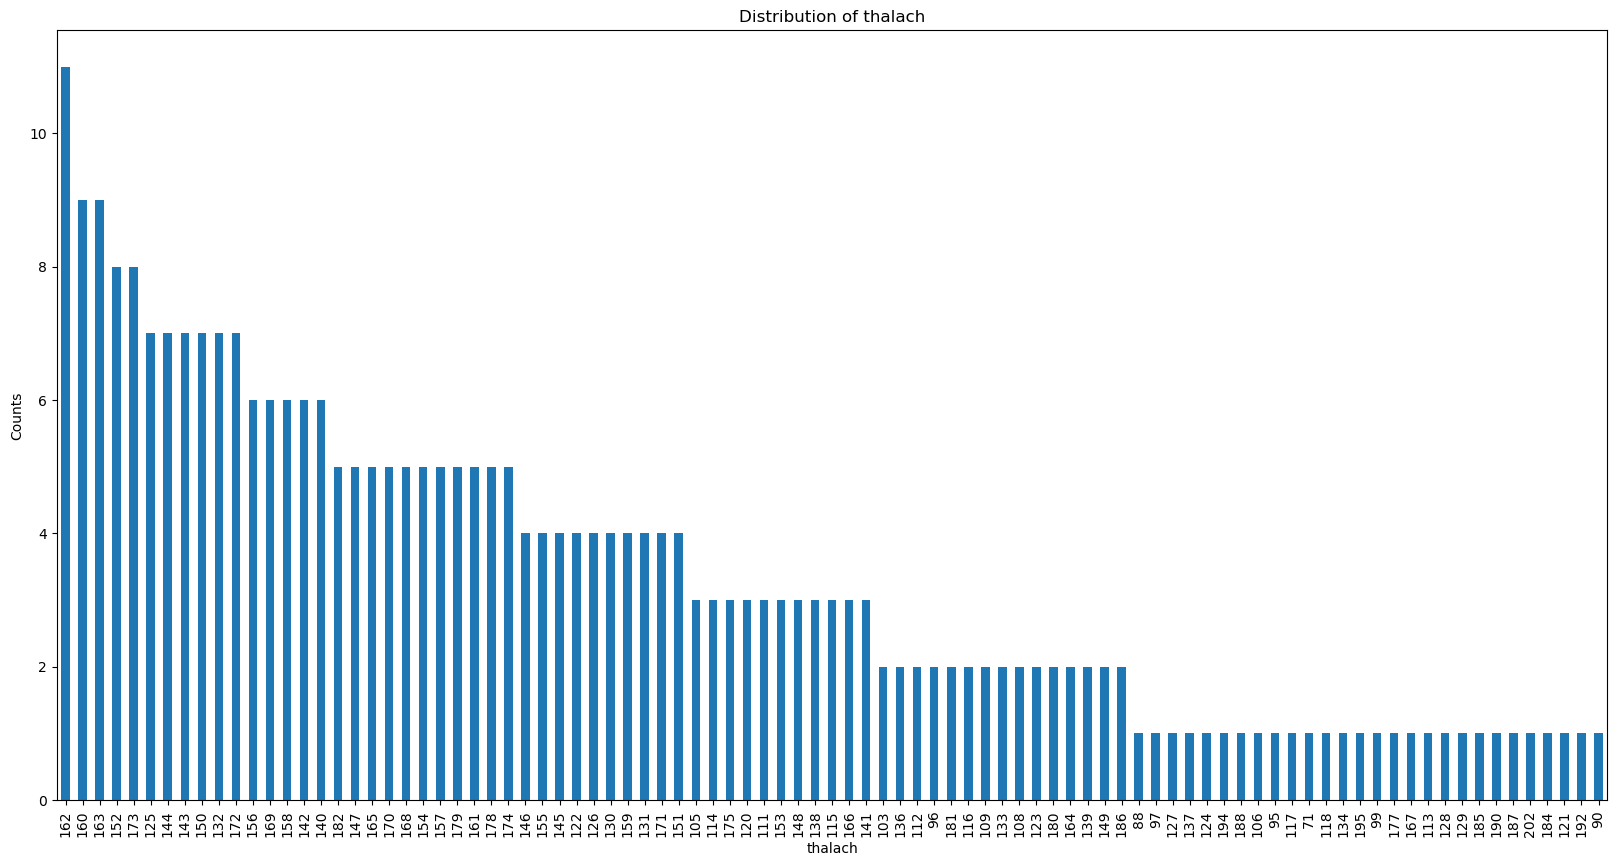

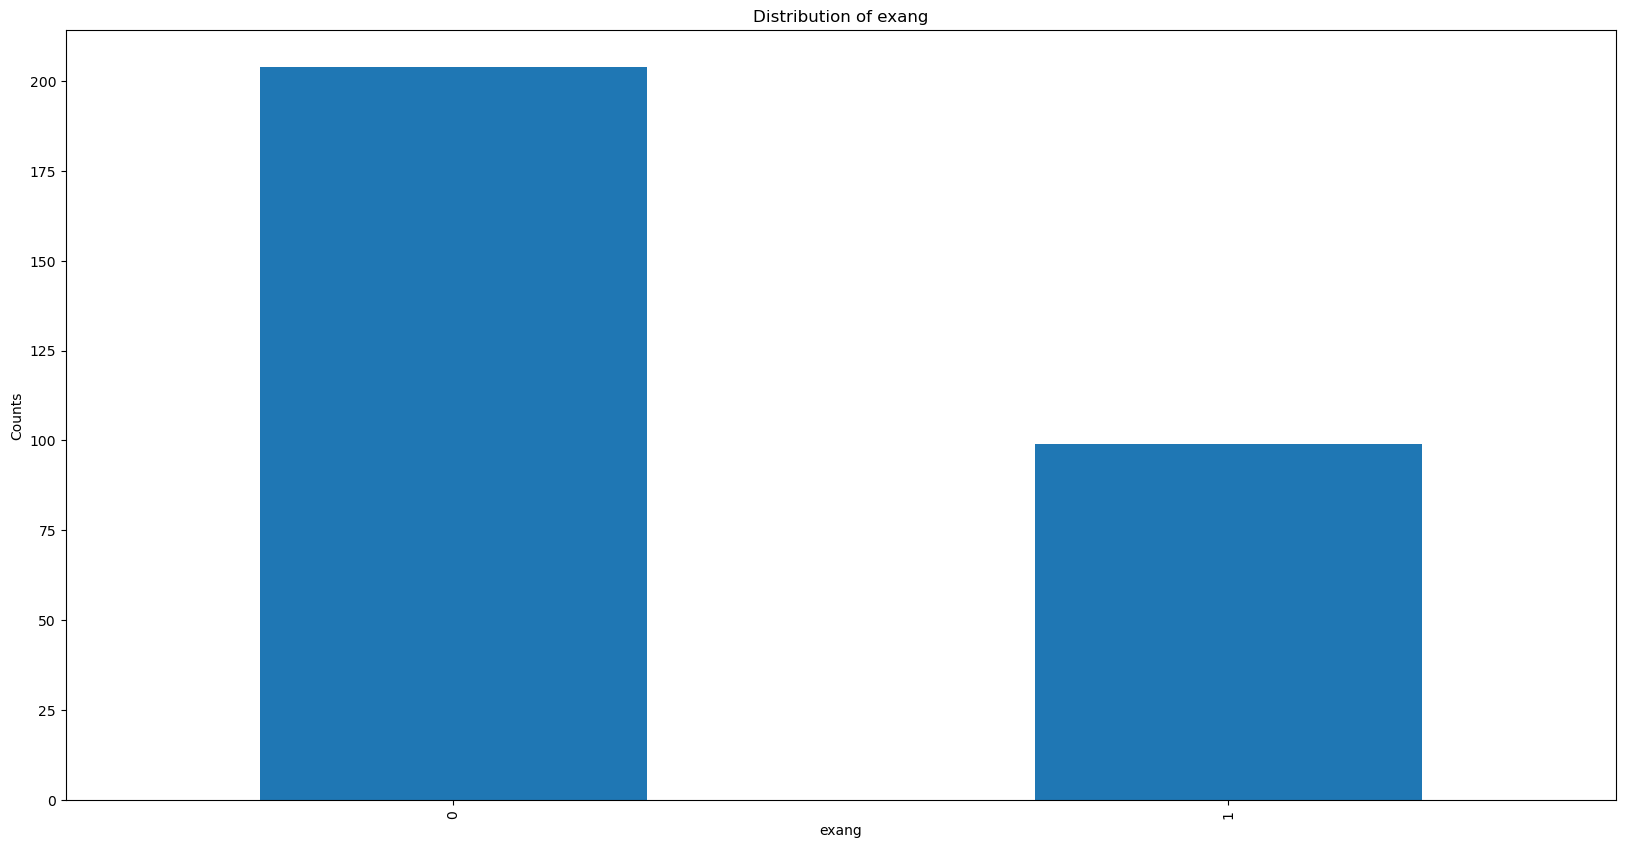

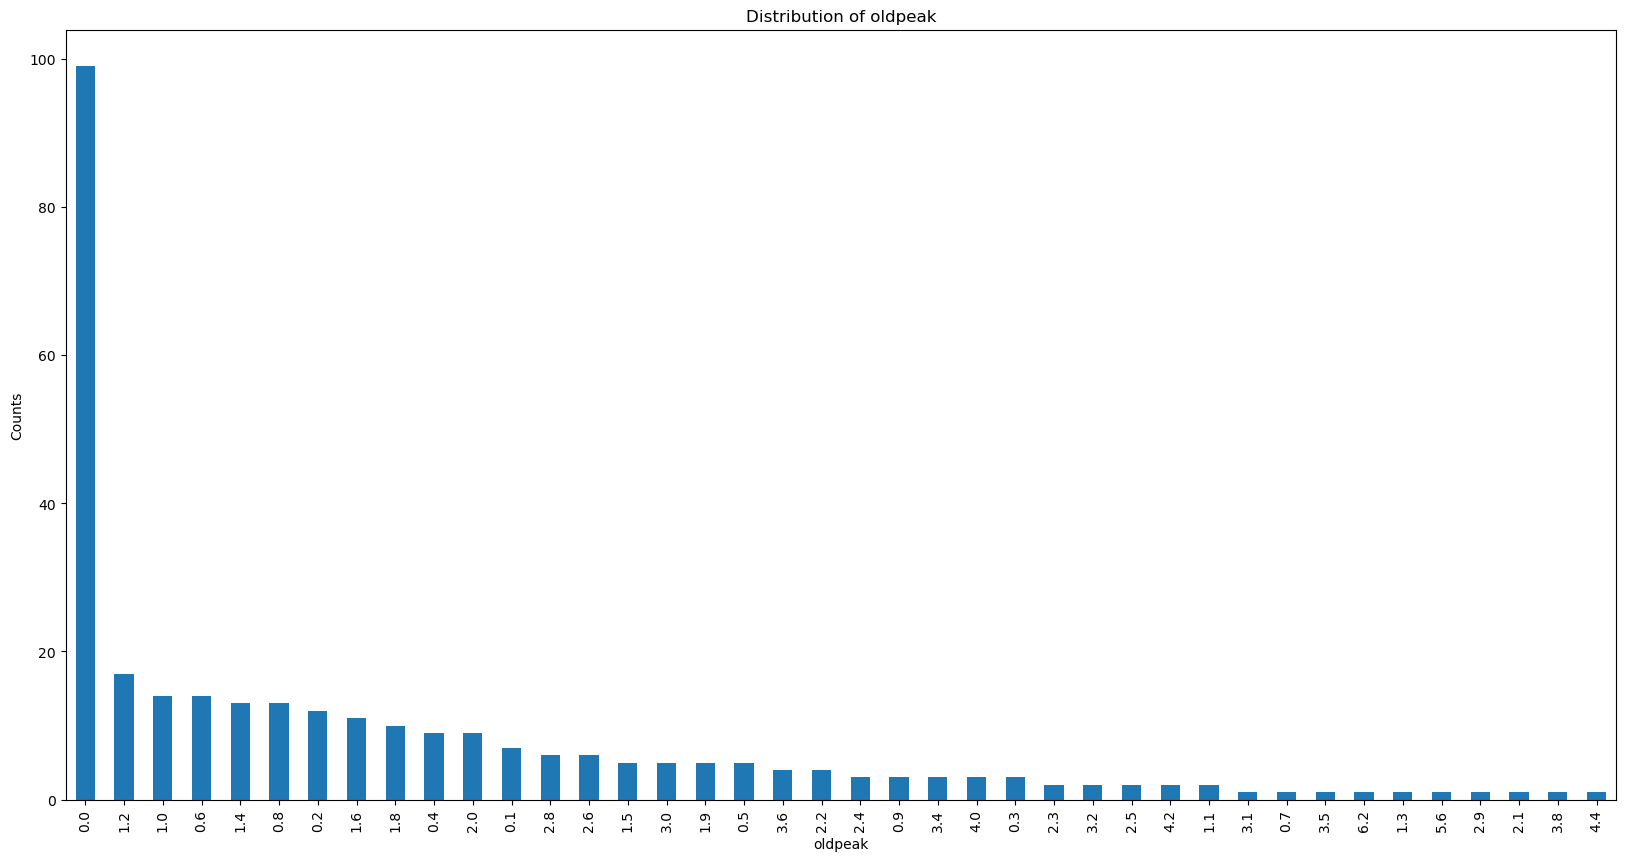

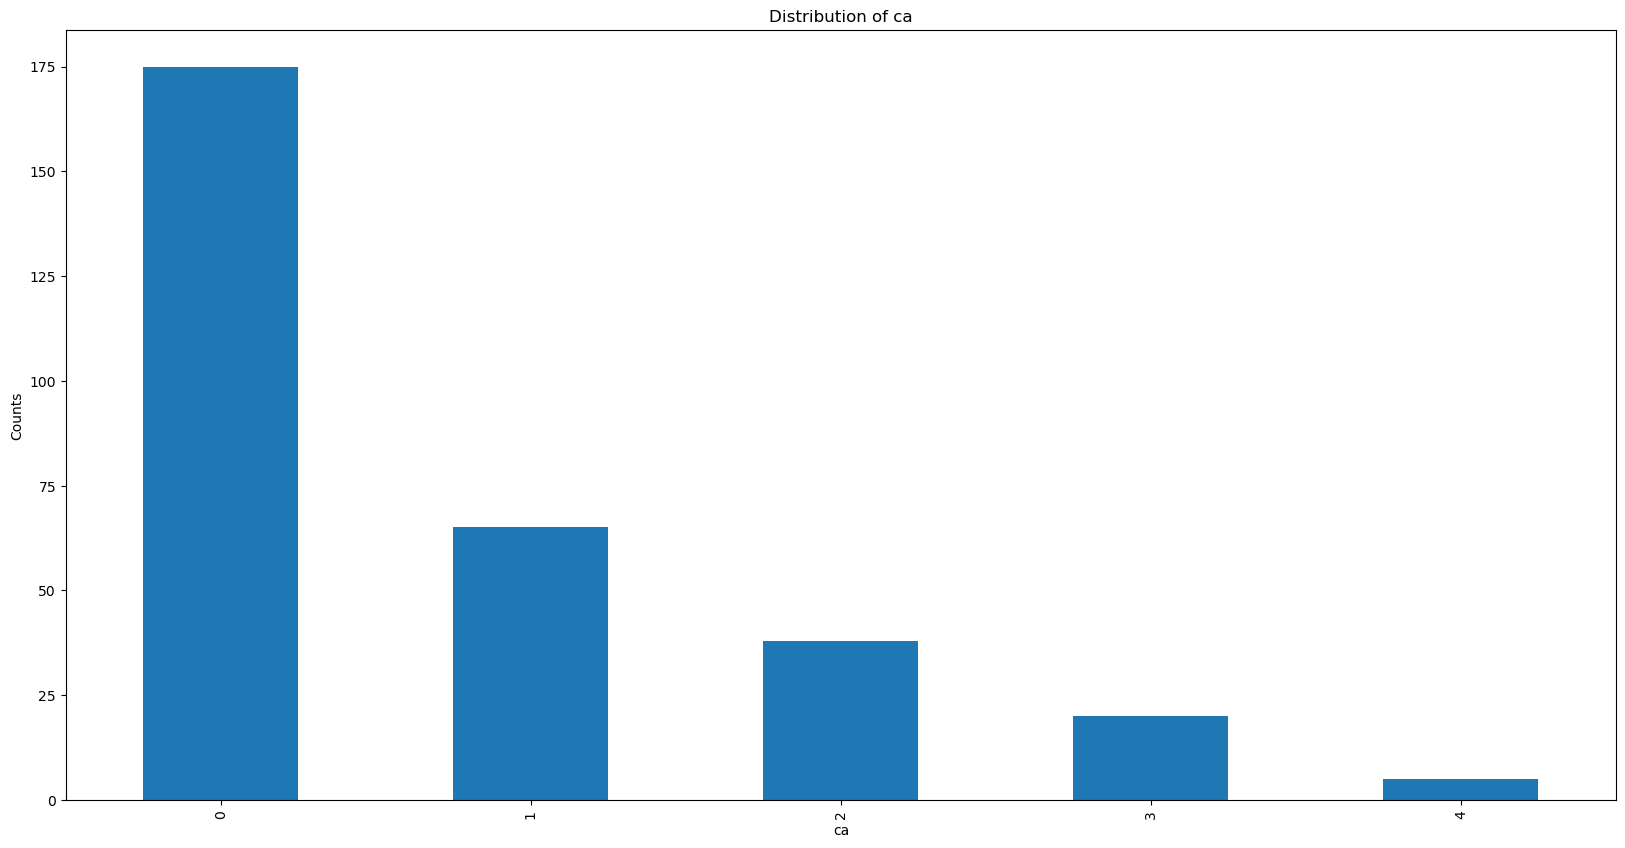

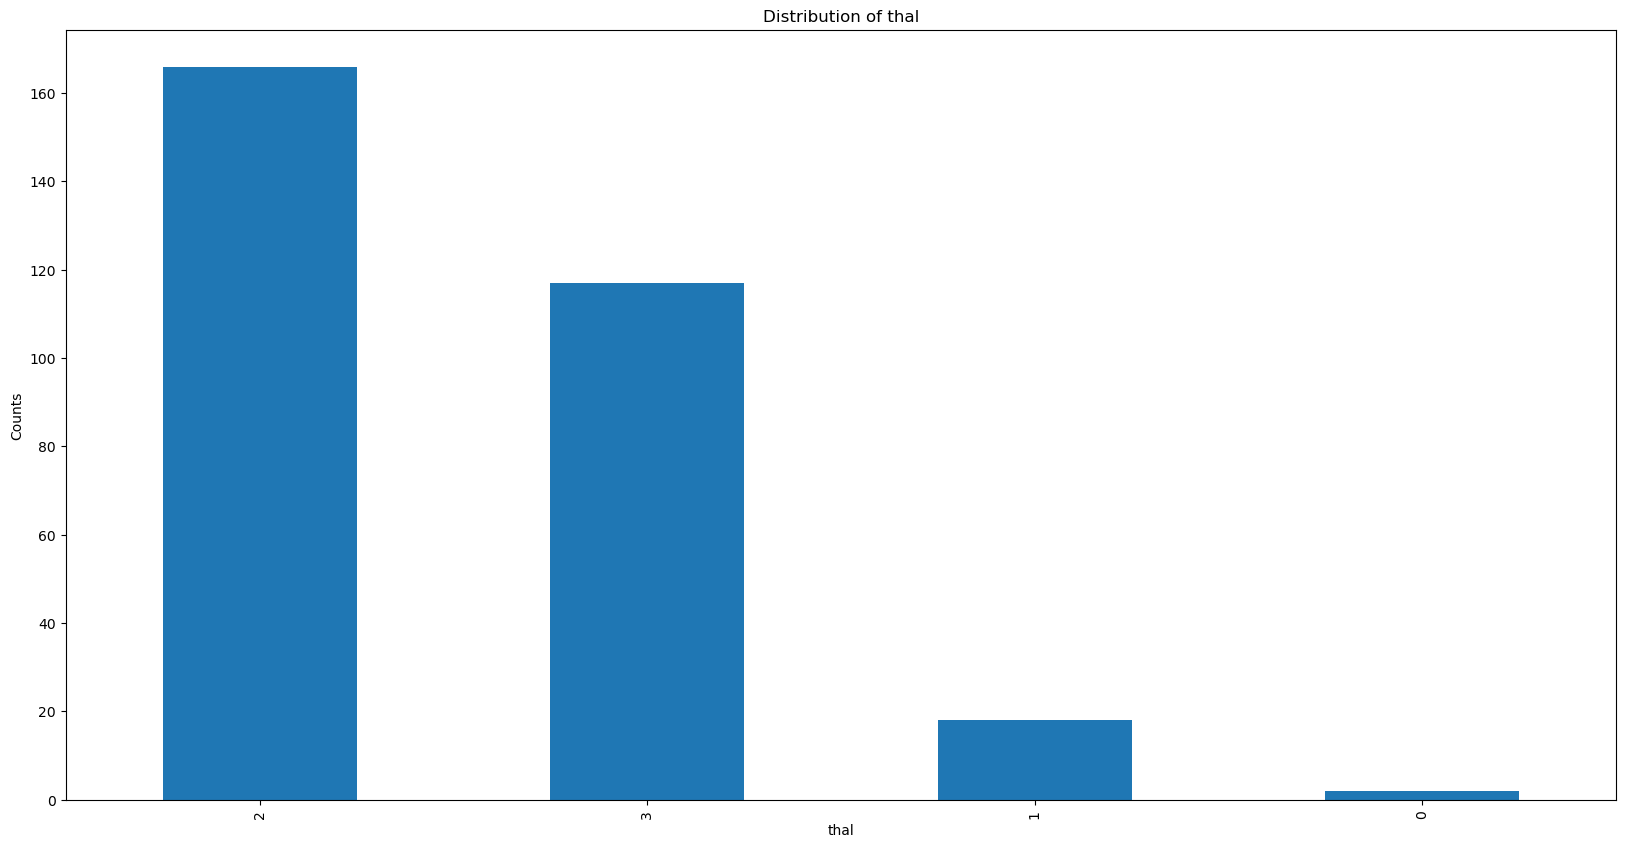

In [8]:
every_columns = ['age' , 'sex' , 'cp','trestbps' , 'chol' , 'fbs','restecg' , 'thalach' , 'exang','oldpeak' , 'ca' , 'thal']

for column in every_columns:
    
    plt.figure(figsize=(20,10))
    data[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.title(f'Distribution of {column}')

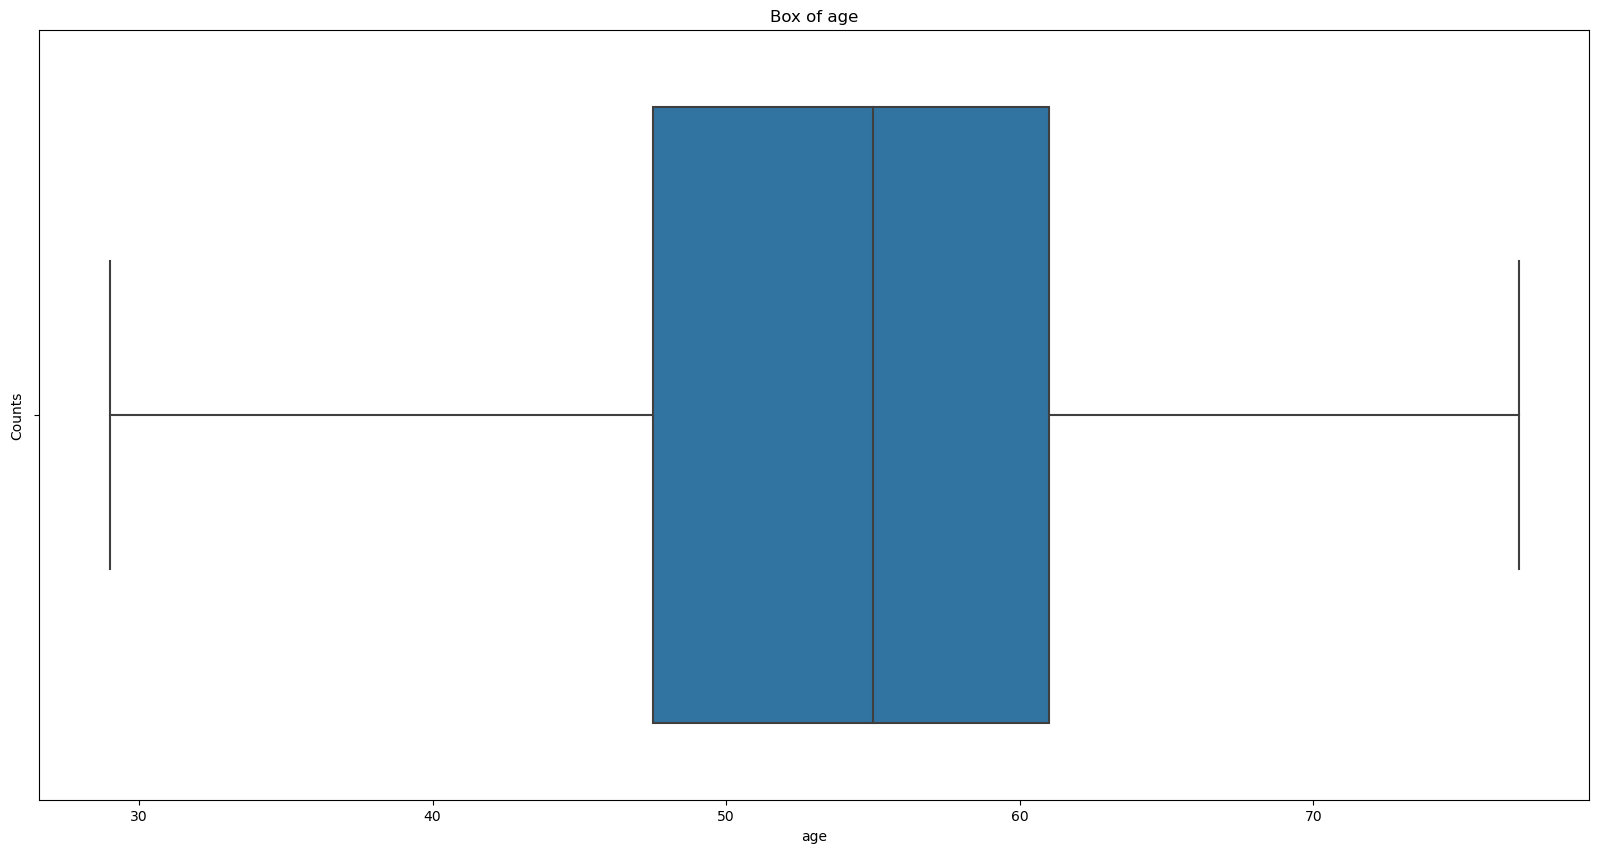

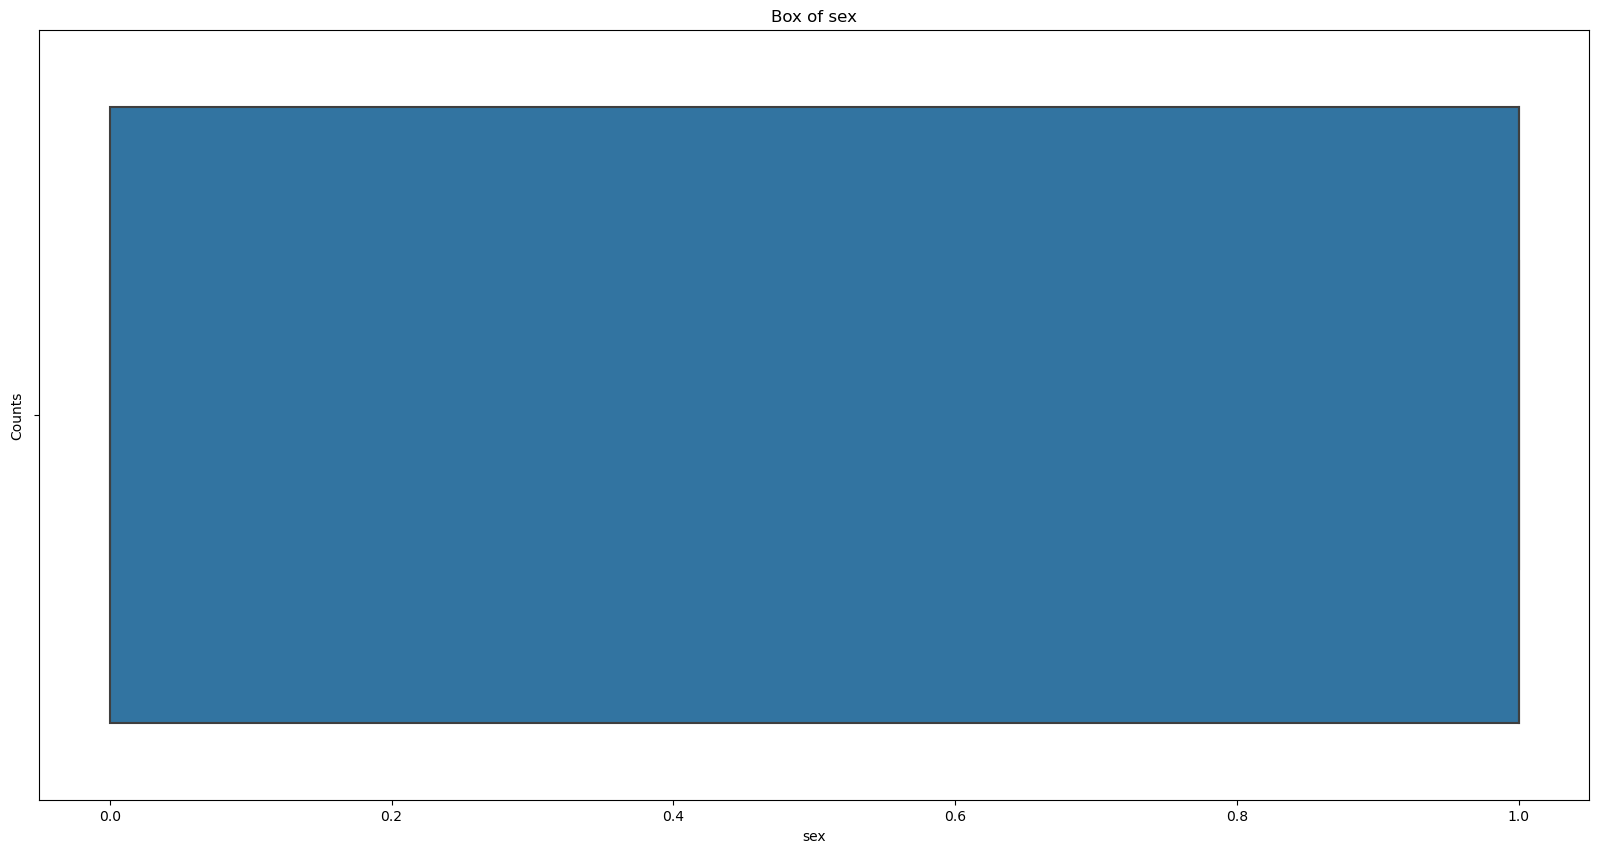

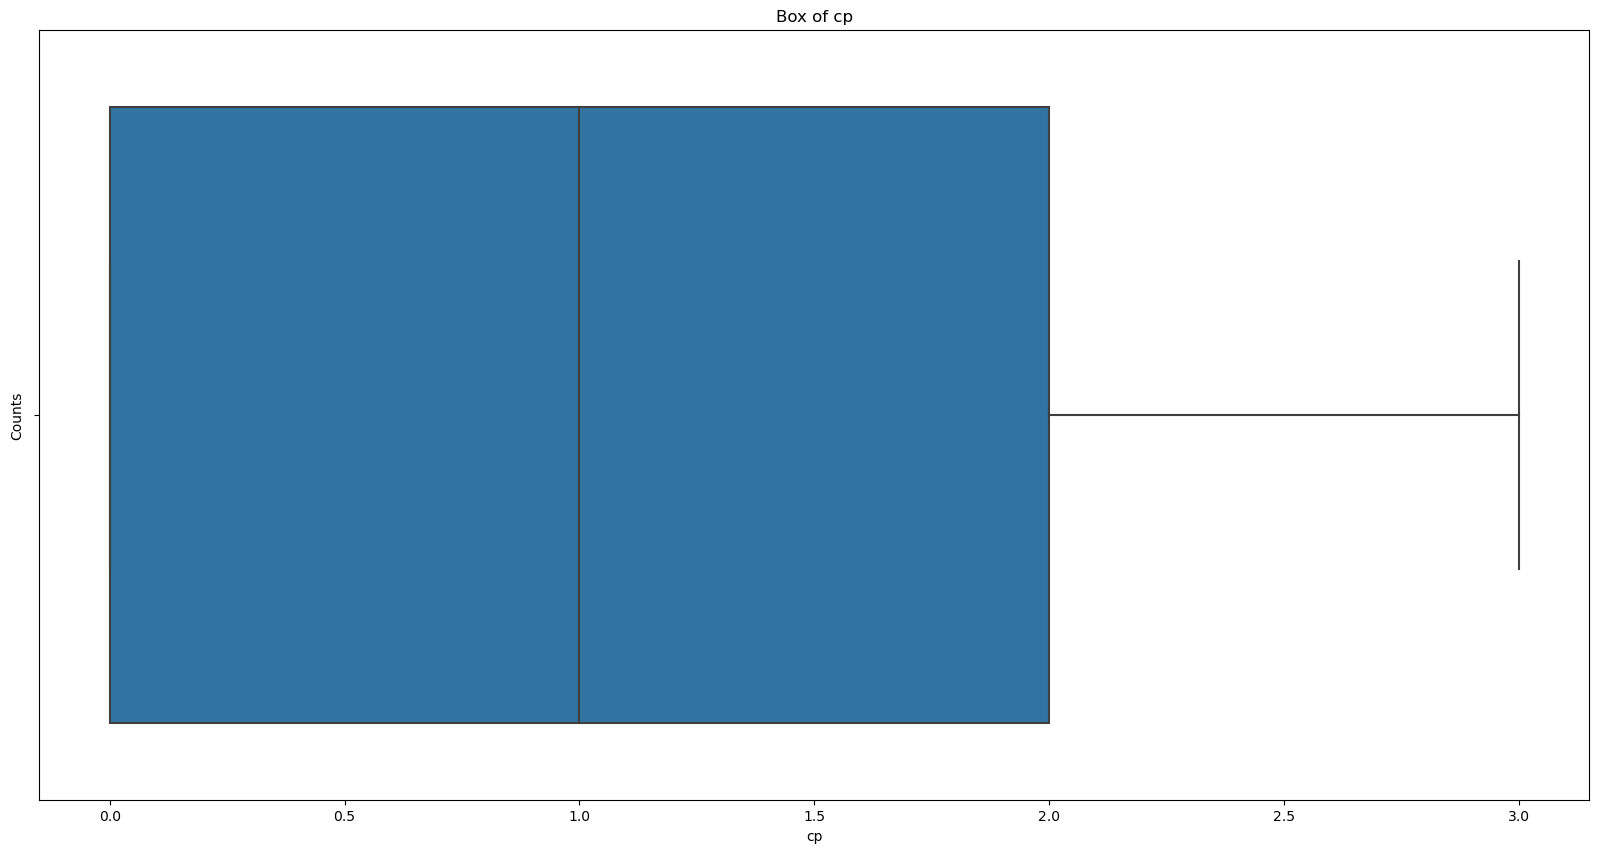

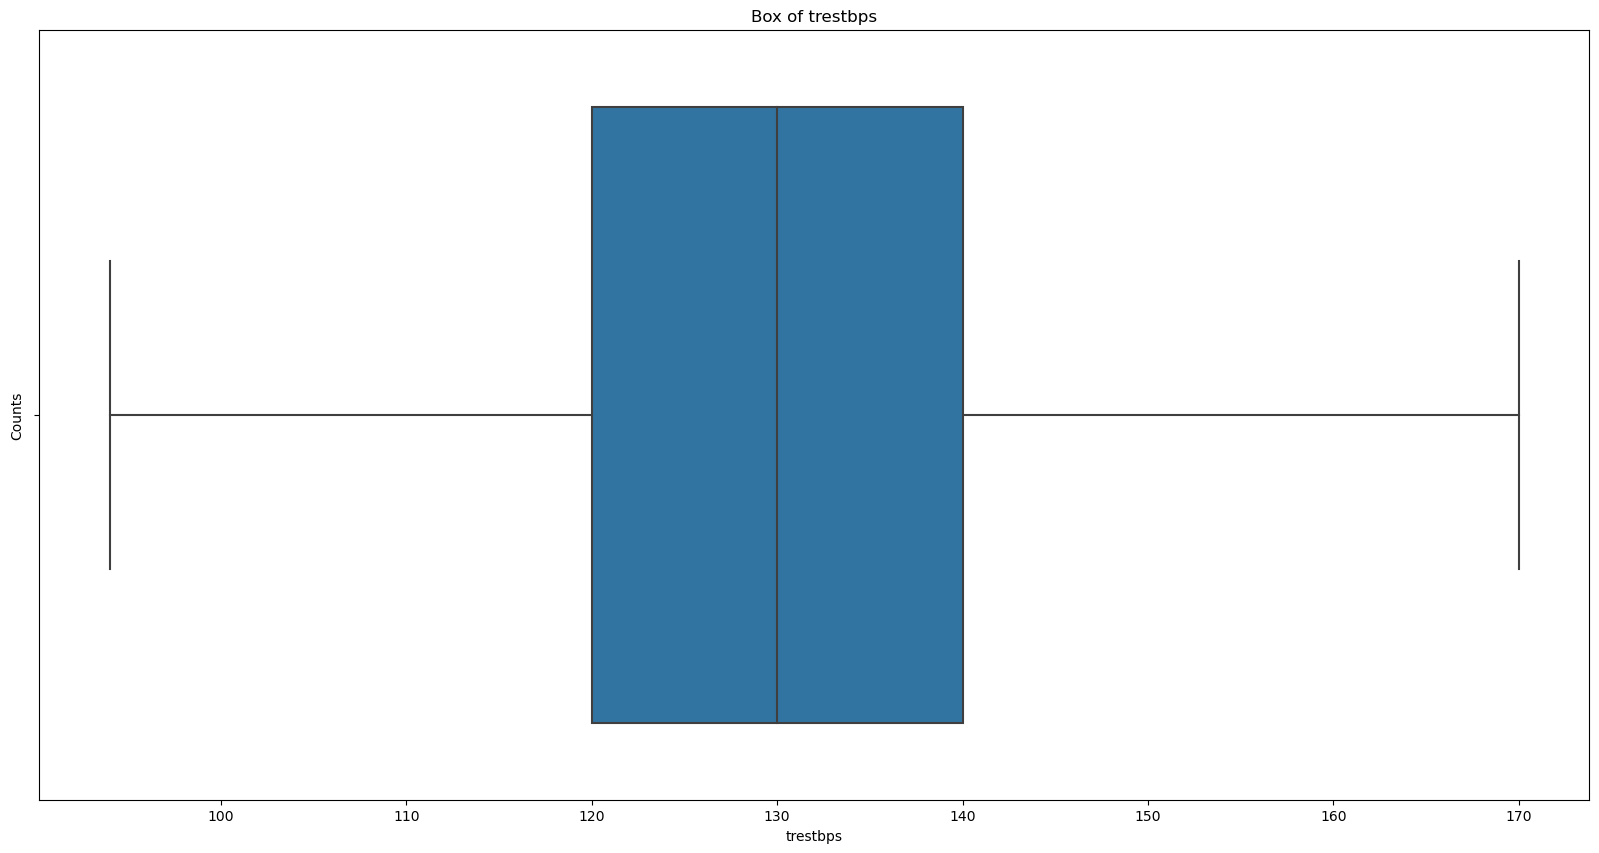

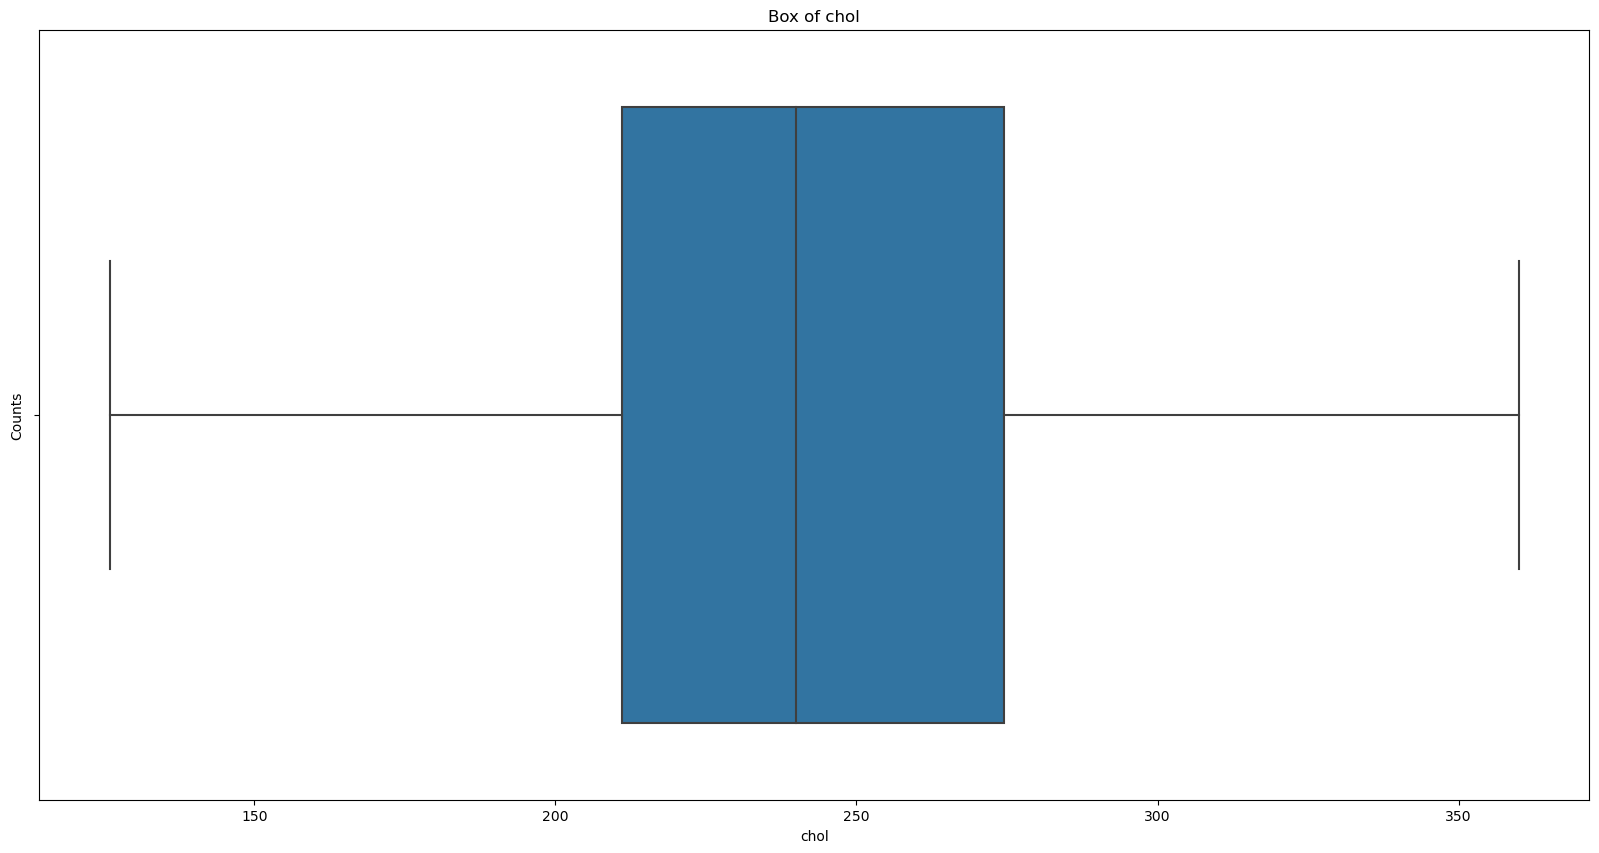

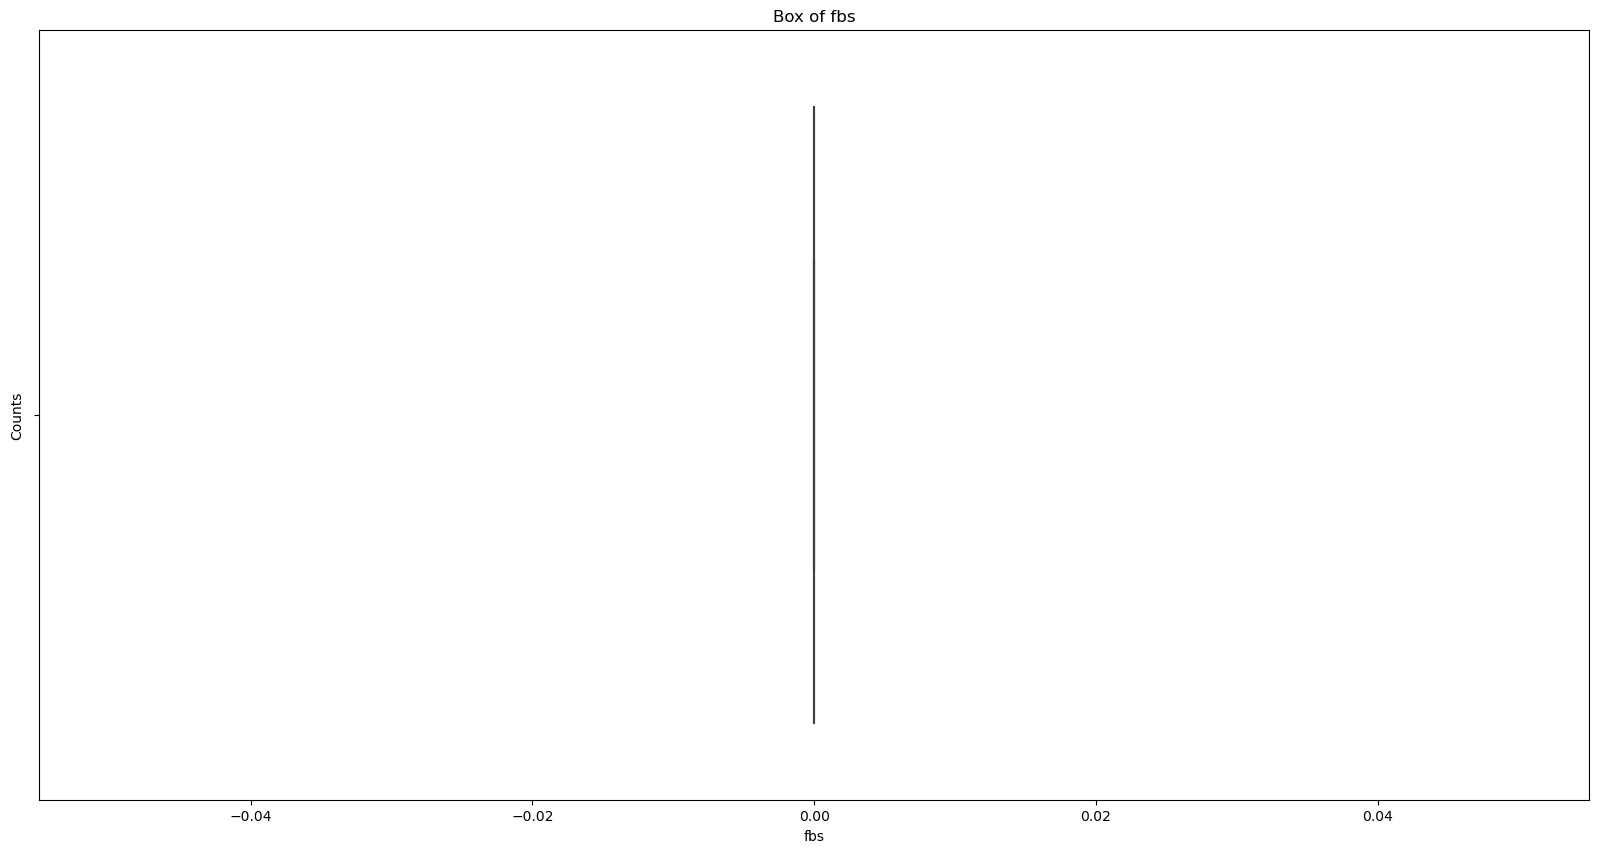

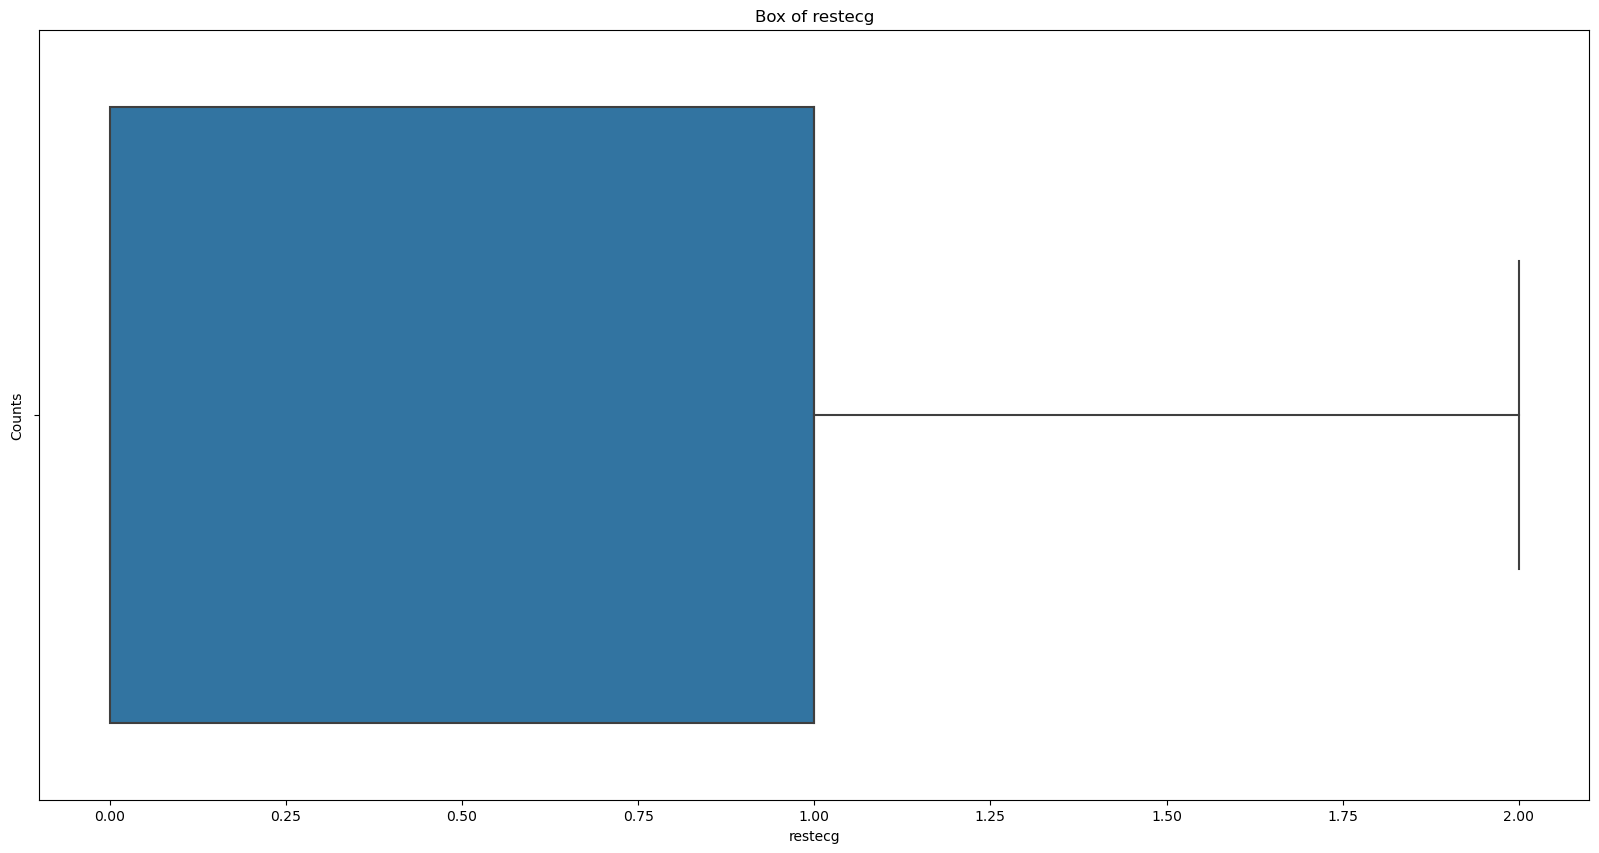

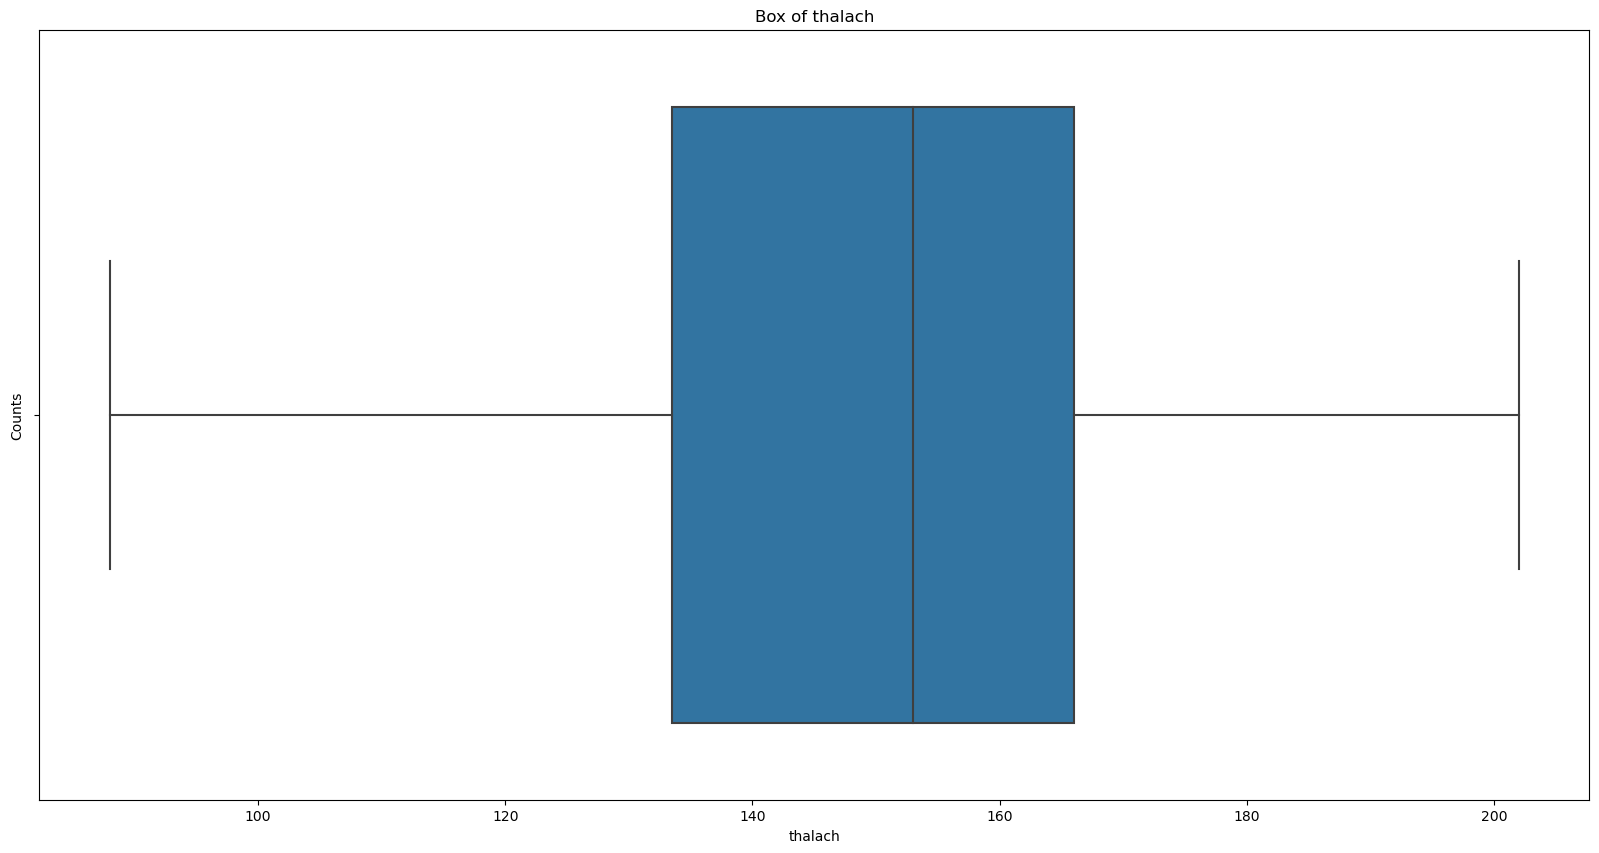

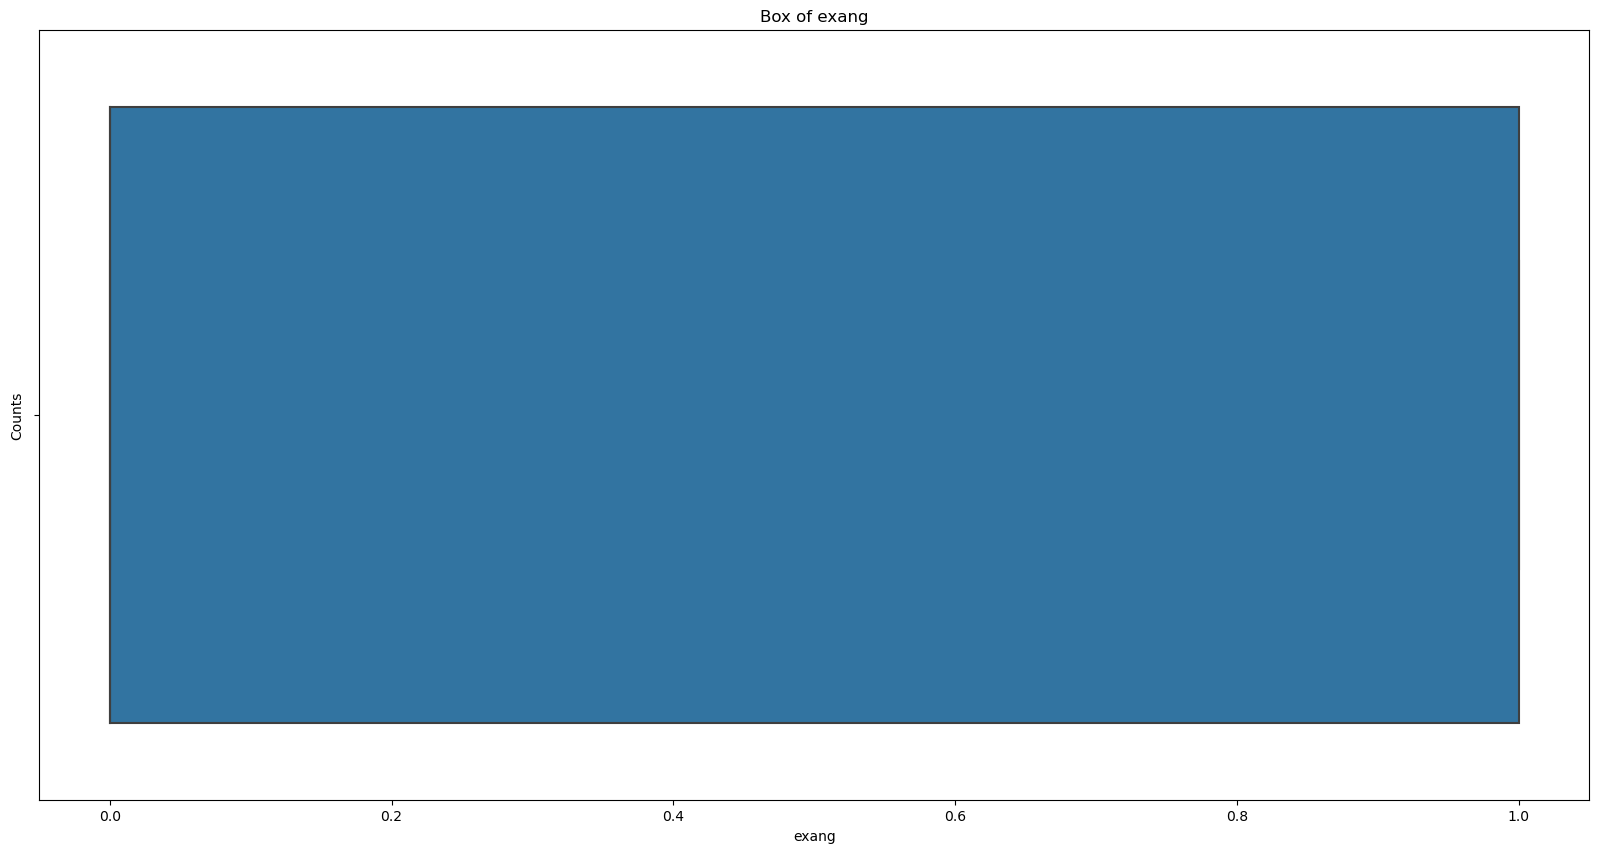

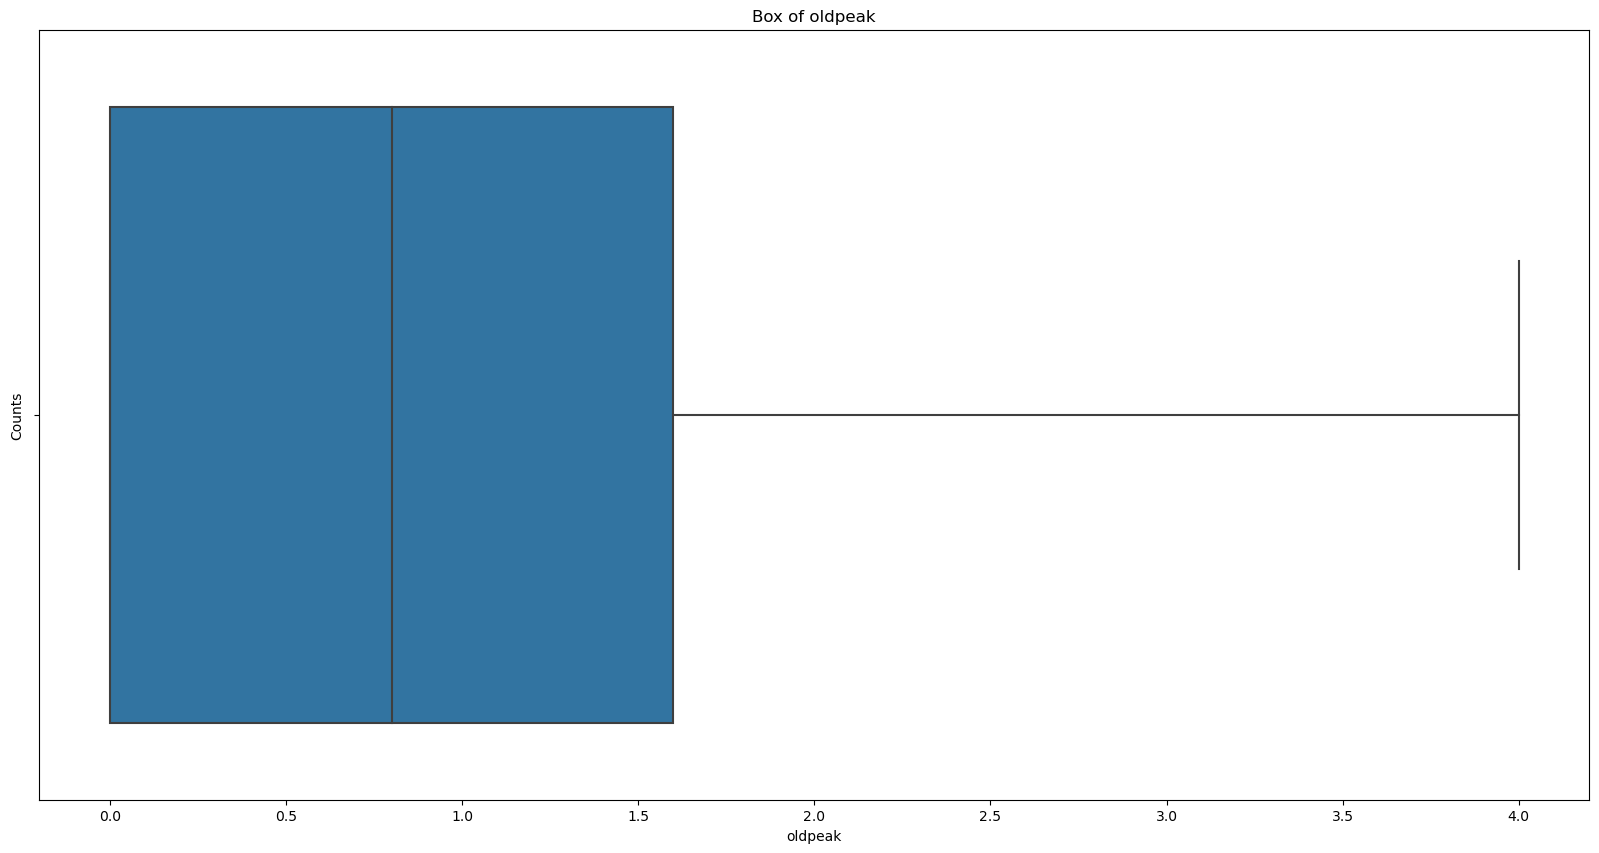

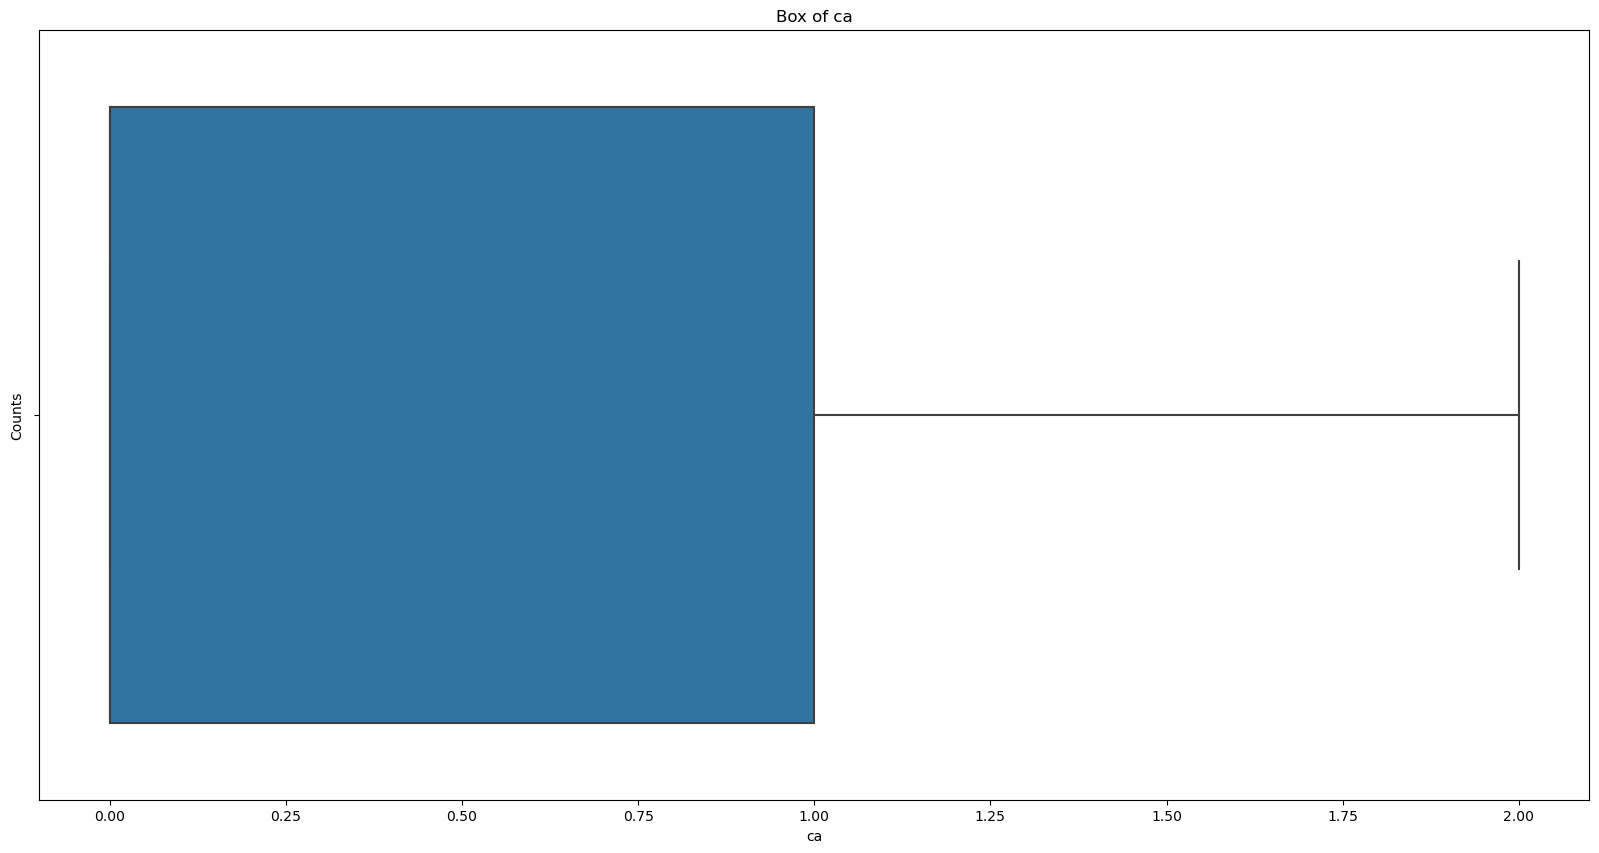

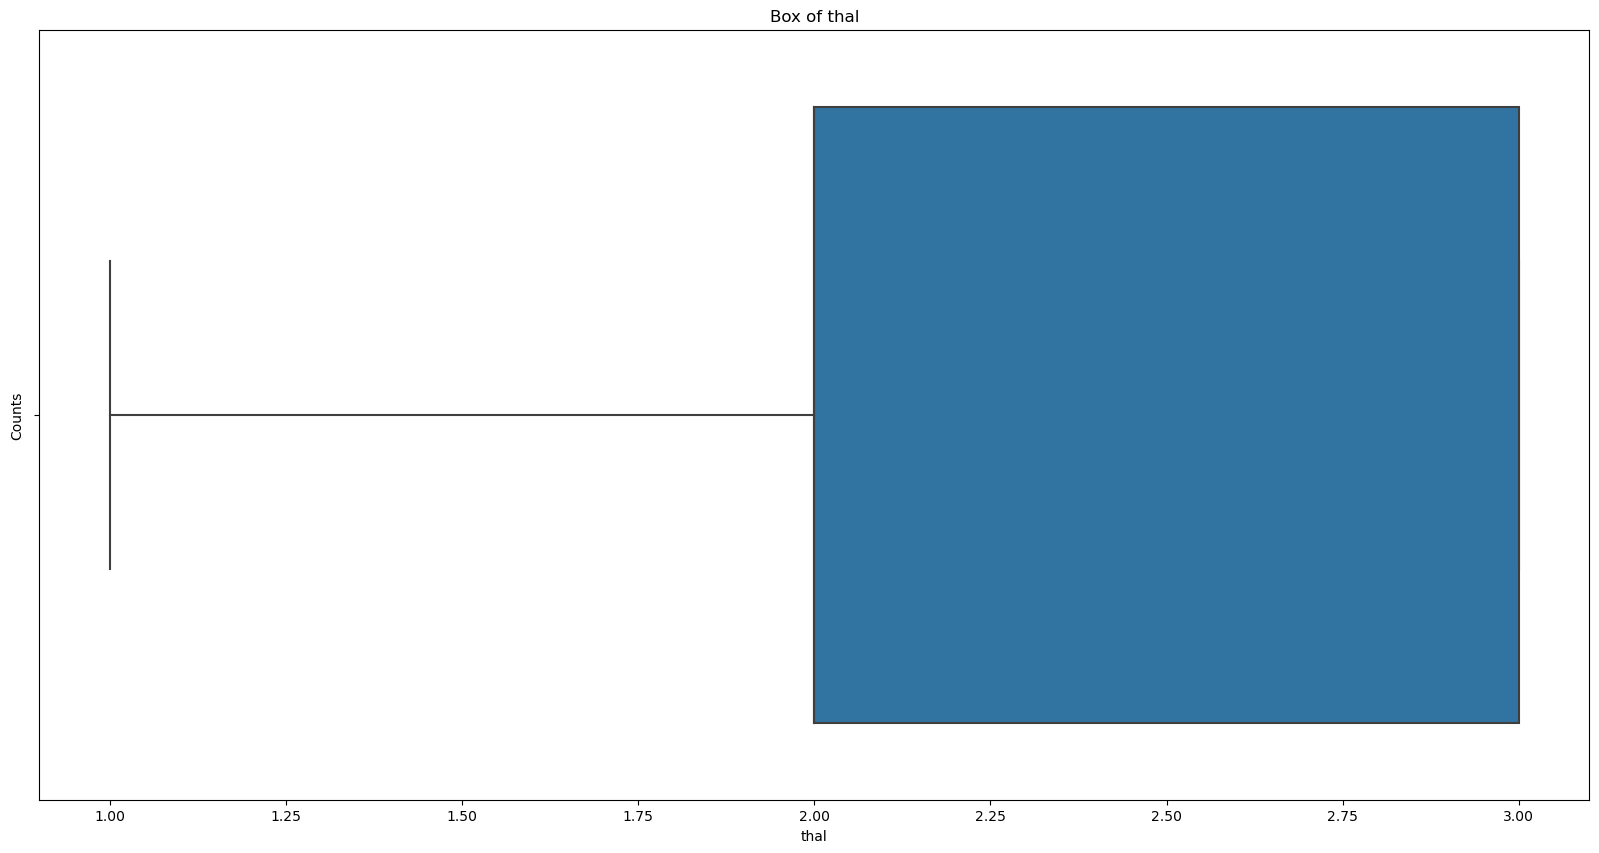

In [9]:
for column in every_columns:
    
    plt.figure(figsize=(20,10))
    sns.boxplot(data=data , x=column , showfliers=False)
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.title(f'Box of {column}')

In [10]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
data.groupby('sex')['target'].mean()

sex
0    0.750000
1    0.449275
Name: target, dtype: float64

<Axes: xlabel='target', ylabel='count'>

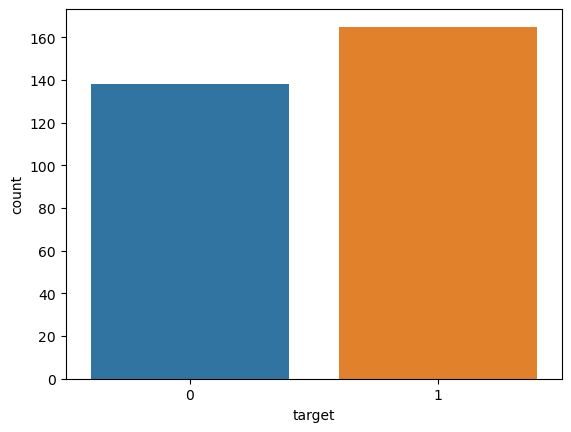

In [12]:
sns.countplot(data=data, x='target')

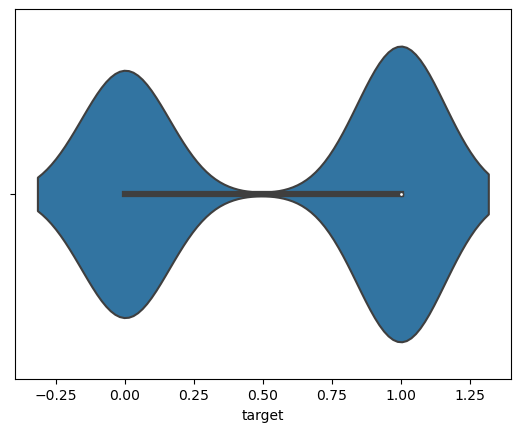

In [13]:
sns.violinplot(data=data, x='target')
plt.show()

<Axes: xlabel='sex', ylabel='count'>

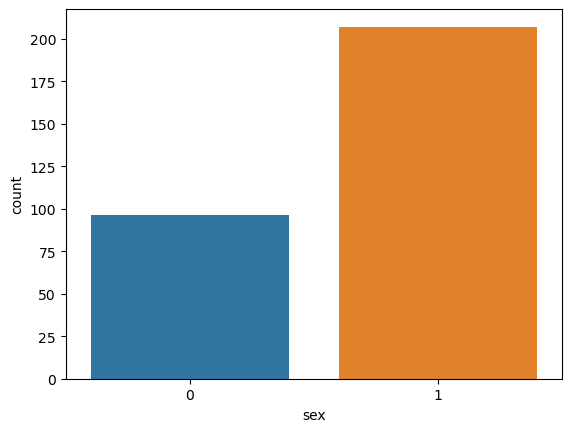

In [14]:
sns.countplot(data=data, x='sex')

<p style="background-color:rgb(224, 245, 105);font-family:newtimeroman;color:rgb(12, 12, 12);font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING</p>

In [15]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [16]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<p style="background-color:rgb(224, 245, 105);font-family:newtimeroman;color:rgb(12, 12, 12);font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCECCING</p>

In [17]:
X = data.drop('target', axis=1)


In [18]:
y = data['target']


In [19]:
df = X
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

<p style="background-color:rgb(224, 245, 105);font-family:newtimeroman;color:rgb(12, 12, 12);font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCECCING:  Normalization : Encoding</p>

In [21]:
new_data = pd.get_dummies(df , columns=['slope'])
new_data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,1,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,2,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,0,2,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,0,2,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,0,3,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,0,3,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,2,3,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,1,3,0,1,0


<p style="background-color:rgb(224, 245, 105);font-family:newtimeroman;color:rgb(12, 12, 12);font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCECCING: Scaling</p>

In [22]:
from sklearn.preprocessing import StandardScaler

# Create an object of the StandardScaler class
scaler = StandardScaler()

# Scale the data
data_new = scaler.fit_transform(new_data)

# Scale data displayed
data_new


array([[ 0.9521966 ,  0.68100522,  1.97312292, ...,  3.66450153,
        -0.92676626, -0.93914194],
       [-1.91531289,  0.68100522,  1.00257707, ...,  3.66450153,
        -0.92676626, -0.93914194],
       [-1.47415758, -1.46841752,  0.03203122, ..., -0.27288841,
        -0.92676626,  1.06480177],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.27288841,
         1.07902072, -0.93914194],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.27288841,
         1.07902072, -0.93914194],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.27288841,
         1.07902072, -0.93914194]])

<p style="background-color:rgb(224, 245, 105);font-family:newtimeroman;color:rgb(12, 12, 12);font-size:150%;text-align:center;border-radius:10px 10px;">DATA MODLING</p>

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

<p style="background-color:rgb(224, 245, 105);font-family:newtimeroman;color:rgb(12, 12, 12);font-size:150%;text-align:center;border-radius:10px 10px;">DecisionTree</p>

In [24]:
# Divide the data into two sets of training and testing
data_new_train, data_new_test, y_train, y_test = train_test_split(data_new, y, test_size=0.2, random_state=42)

# Determine the desired hyperparameter values for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Run Grid Search using Recall criterion for classification 1
dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt, param_grid, scoring='recall', cv=10)
grid_search_dt.fit(data_new_train, y_train)

# The best hyperparameters
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for DecisionTree:", best_params_dt)

# Accuracy on test data
accuracy_dt = grid_search_dt.score(data_new_test, y_test)
print("Accuracy on Test Set for DecisionTree:", accuracy_dt)

Best Hyperparameters for DecisionTree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy on Test Set for DecisionTree: 0.75


<p style="background-color:rgb(224, 245, 105);font-family:newtimeroman;color:rgb(12, 12, 12);font-size:150%;text-align:center;border-radius:10px 10px;">SVM</p>

In [25]:
from sklearn.svm import SVC

# Determine the desired hyperparameter values for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Run Grid Search using Recall criterion for classification 1
svm = SVC(random_state=42)
grid_search_svm = GridSearchCV(svm, param_grid, scoring='recall', cv=10)
grid_search_svm.fit(data_new_train, y_train)

# The best hyperparameters
best_params_svm = grid_search_svm.best_params_
print("Best Hyperparameters for SVM:", best_params_svm)

# Accuracy of test data
accuracy_svm = grid_search_svm.score(data_new_test, y_test)
print("Accuracy on Test Set for SVM:", accuracy_svm)

Best Hyperparameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy on Test Set for SVM: 0.9375


<p style="background-color:rgb(224, 245, 105);font-family:newtimeroman;color:rgb(12, 12, 12);font-size:150%;text-align:center;border-radius:10px 10px;">KNN</p>

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Determine the desired hyperparameter values for Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Run Grid Search using Recall criterion for classification 1
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid, scoring='recall', cv=10)
grid_search_knn.fit(data_new_train, y_train)

# The best hyperparameters
best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for KNN:", best_params_knn)

# Accuracy of test data
accuracy_knn = grid_search_knn.score(data_new_test, y_test)
print("Accuracy on Test Set for KNN:", accuracy_knn)

Best Hyperparameters for KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Accuracy on Test Set for KNN: 0.875


<p style="background-color:rgb(224, 245, 105);font-family:newtimeroman;color:rgb(12, 12, 12);font-size:150%;text-align:center;border-radius:10px 10px;">RandomForest</p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Determine the desired hyperparameter values for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Run Grid Search using Recall criterion for classification 1
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid, scoring='recall', cv=5)
grid_search_rf.fit(data_new_train, y_train)

# The best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for RandomForest:", best_params_rf)

# Accuracy of test data
accuracy_rf = grid_search_rf.score(data_new_test, y_test)
print("Accuracy on Test Set for RandomForest:", accuracy_rf)

In [ ]:
#peyman_radmanesh